# Fine-tuning YOLO

In [1]:
!pip install ultralytics --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import shutil
from pathlib import Path

# Ruta original
base = Path('/content/drive/MyDrive/vision/proyecto')

# Mover imágenes
#shutil.move(base/'Imagenes/train', base/'images/train')
#shutil.move(base/'Imagenes/val', base/'images/val')
#shutil.move(base/'Imagenes/test', base/'images/test')

# Mover etiquetas (y cambiar nombre de "validation" a "val")
#shutil.move(base/'Etiquetas/train', base/'labels/train')
#shutil.move(base/'Etiquetas/validation', base/'labels/val')
#shutil.move(base/'Etiquetas/test', base/'labels/test')

In [4]:
import os
import glob
from collections import Counter

# Ruta base
labels_base_path = f'{base}/labels'

# Inicializamos un contador
class_counter = Counter()

# Recorremos subcarpetas (train, val, test)
for split in ['train', 'val', 'test']:
    label_files = glob.glob(os.path.join(labels_base_path, split, '*.txt'))
    for label_file in label_files:
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if parts:  # asegurarse de que no esté vacío
                    class_id = int(parts[0])
                    class_counter[class_id] += 1

# Mostrar resultados
print("Resumen de clases encontradas:")
for class_id, count in sorted(class_counter.items()):
    print(f"Clase {class_id}: {count} anotaciones")

Resumen de clases encontradas:
Clase 0: 44 anotaciones
Clase 1: 2305 anotaciones
Clase 2: 1013 anotaciones
Clase 3: 642 anotaciones
Clase 4: 129 anotaciones


Clase 3


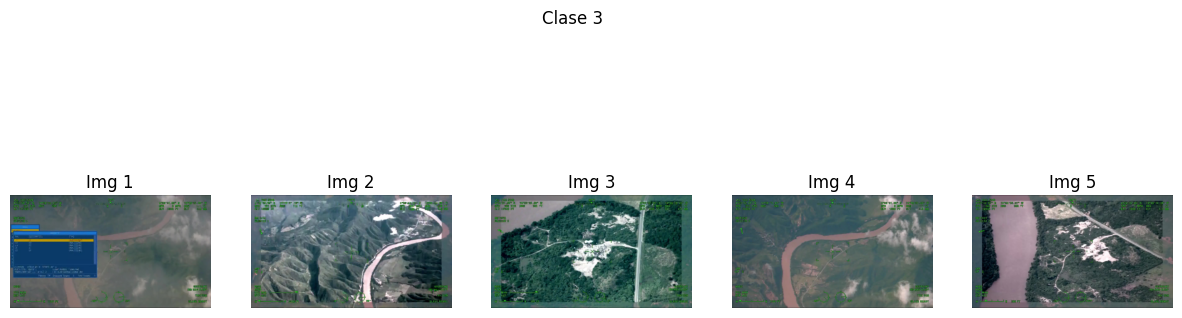

Clase 2


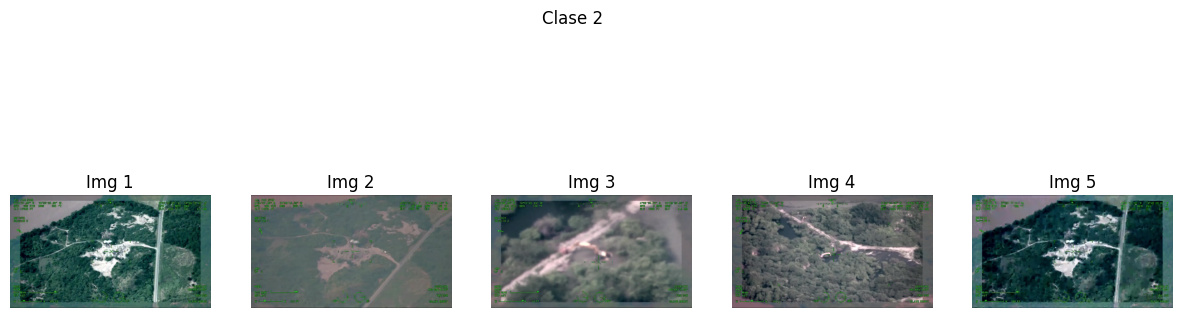

Clase 4


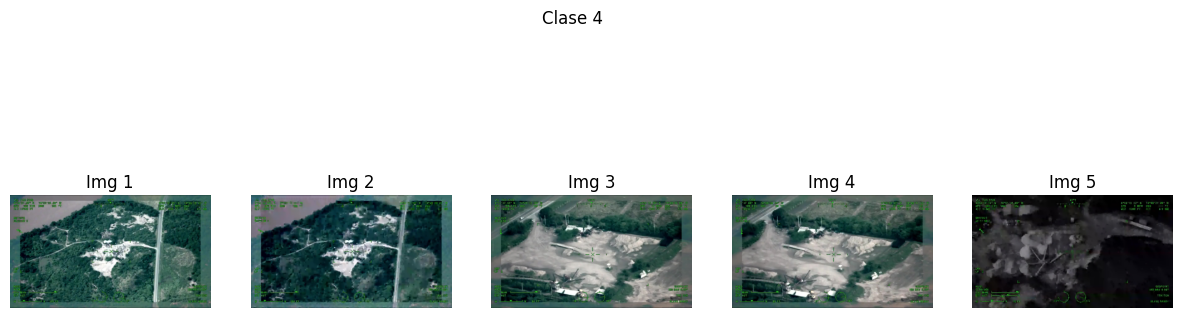

Clase 1


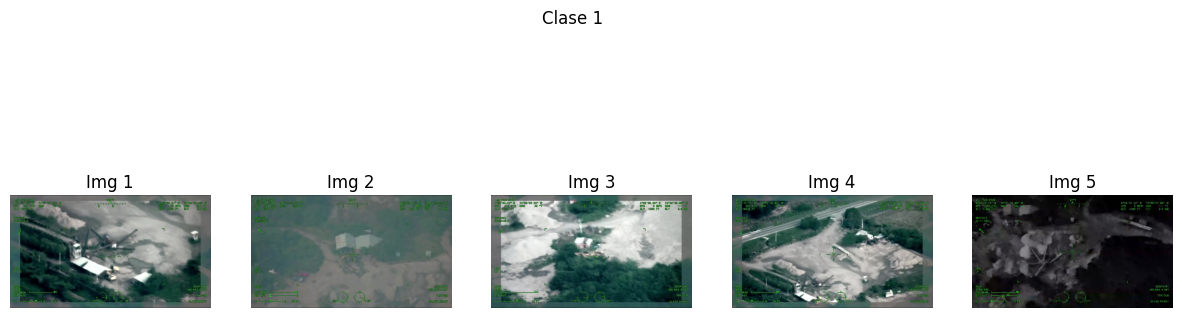

Clase 0


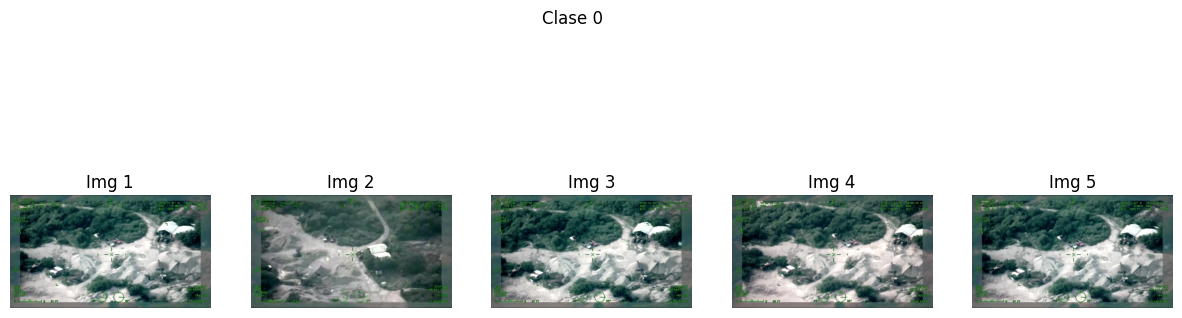

In [5]:
import os
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import cv2

base = Path('/content/drive/MyDrive/vision/proyecto')

# Rutas a las carpetas
images_path = f'{base}/images/train'
labels_path = f'{base}/labels/train'

# Diccionario para guardar imágenes por clase
class_to_images = defaultdict(list)

# Leer archivos de etiquetas y agrupar imágenes por clase
for label_file in glob.glob(os.path.join(labels_path, '*.txt')):
    with open(label_file, 'r') as f:
        lines = f.readlines()
        classes_in_file = set(line.split()[0] for line in lines)

    # Imagen correspondiente
    image_filename = os.path.basename(label_file).replace('.txt', '.jpg')  # o .png si aplica
    image_path = os.path.join(images_path, image_filename)

    # Asignar imagen a cada clase encontrada en su etiqueta
    for class_id in classes_in_file:
        if len(class_to_images[class_id]) < 5:  # Solo guardar hasta 5 por clase
            if os.path.exists(image_path):
                class_to_images[class_id].append(image_path)

# Visualizar 5 imágenes por clase
for class_id, image_paths in class_to_images.items():
    print(f"Clase {class_id}")
    fig, axs = plt.subplots(1, len(image_paths), figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[i].imshow(img)
        axs[i].set_title(f"Img {i+1}")
        axs[i].axis('off')
    plt.suptitle(f"Clase {class_id}")
    plt.show()

In [6]:
# Leer archivos de etiquetas y agrupar imágenes por clase
for label_file in glob.glob(os.path.join(labels_path, '*.txt')):
    with open(label_file, 'r') as f:
        lines = f.readlines()
        classes_in_file = set(line.split()[0] for line in lines)

In [7]:
classes_in_file

{'3'}

In [8]:
import shutil
import os

origen = f'{base}/labels/val/val'
destino = f'{base}/labels/val'

# Mover todos los archivos hacia arriba
for nombre_archivo in os.listdir(origen):
    ruta_origen = os.path.join(origen, nombre_archivo)
    ruta_destino = os.path.join(destino, nombre_archivo)
    shutil.move(ruta_origen, ruta_destino)

# Borrar la carpeta duplicada
os.rmdir(origen)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/vision/proyecto/labels/val/val'

In [9]:
data_yaml = f"""
path: {base}
train: images/train
val: images/val
test: images/test

nc: 5
names: ['Vehiculos', 'estructuras', 'carretera', 'rio', 'area descubierta']  # Cambia según tus clases
"""

with open(f"{base}/data.yaml", "w") as f:
    f.write(data_yaml)

In [10]:
import torch

print(f"CUDA available: {torch.cuda.is_available()}")
print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")

CUDA available: True
GPU: NVIDIA A100-SXM4-40GB


In [20]:
from ultralytics import YOLO
from itertools import product
import pandas as pd

# Hiperparámetros
img_sizes = [1024, 640]
learning_rates = [0.01, 0.001]
mixup_values = [0.0, 0.2]

# Para guardar resultados
# results_log = []

# Combinaciones de parámetros
combinations = list(product(img_sizes, learning_rates, mixup_values))

for i, (imgsz, lr0, mixup) in enumerate(combinations):
    print(f"\nEntrenando combinación {i+1}/{len(combinations)}: imgsz={imgsz}, lr0={lr0}, mixup={mixup}")
    run_name = f'yolo11_hpsearch_{imgsz}_{lr0}_{mixup}'

    if any((row['run_name'] == run_name for row in results_log)):
        print(f"Ya entrenado: {run_name}")
        continue

    model = YOLO('yolo11x.pt')

    # Ajuste dinámico del batch según tamaño
    batch = 16 if imgsz == 640 else 8

    model.train(
        data=f'{base}/data.yaml',
        epochs=150,
        imgsz=imgsz,
        batch=batch,
        lr0=lr0,
        degrees=10,
        translate=0.1,
        scale=0.5,
        shear=2.0,
        flipud=0.1,
        mosaic=1.0,
        mixup=mixup,
        warmup_epochs=3,
        name=run_name,
        project = f'{base}/yolo_hpsearch_results',
        device=0,
        save_period=5,
        patience=10
    )

    # Evaluar modelo entrenado
    results = model.val(split='test')

    # Guardar hiperparámetros y métricas clave
    results_log.append({
        'imgsz': imgsz,
        'lr0': lr0,
        'mixup': mixup,
        'batch': batch,
        'run_name': run_name,
        'mAP@0.5': results.box.map50,
        'mAP@0.5:0.95': results.box.map,
        'Precision': results.box.mp,
        'Recall': results.box.mr
    })

# Convertir a DataFrame final
df_results = pd.DataFrame(results_log)
df_results = df_results.sort_values(by='mAP@0.5:0.95', ascending=False)
df_results.to_csv(f'{base}/summary_results.csv', index=False)


Entrenando combinación 1/8: imgsz=1024, lr0=0.01, mixup=0.0
Ya entrenado: yolo11_hpsearch_1024_0.01_0.0

Entrenando combinación 2/8: imgsz=1024, lr0=0.01, mixup=0.2
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/vision/proyecto/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11x.pt, momentum=

train: Scanning /content/drive/MyDrive/vision/proyecto/labels/train.cache... 1178 images, 230 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.4 ms, read: 17.4±11.3 MB/s, size: 63.9 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/val.cache... 107 images, 16 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      19.8G      2.406      3.599      2.624         19       1024: 100%|██████████| 148/148 [00:47<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]

                   all        107        392     0.0716      0.128     0.0372     0.0095



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      19.8G      2.417      3.212       2.68         35       1024: 100%|██████████| 148/148 [00:45<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.85it/s]

                   all        107        392      0.725      0.106     0.0649     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      20.2G      2.397      3.219      2.673          5       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        107        392     0.0989      0.148     0.0866     0.0276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150        20G      2.335      3.099      2.605         14       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.14it/s]

                   all        107        392     0.0458      0.163      0.101     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      20.3G      2.285      2.995      2.571         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]

                   all        107        392     0.0965      0.178     0.0866     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      20.1G      2.233      2.871      2.518         39       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.51it/s]

                   all        107        392      0.187      0.336       0.14     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      20.2G      2.205      2.863      2.499         13       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.45it/s]

                   all        107        392      0.212      0.162      0.164     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      20.1G       2.19      2.798      2.455         12       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.12it/s]

                   all        107        392      0.182      0.245      0.159     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      20.2G      2.148      2.712      2.431          6       1024: 100%|██████████| 148/148 [00:48<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]

                   all        107        392      0.174      0.252      0.157     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      20.1G      2.159      2.662      2.444         18       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]

                   all        107        392      0.165      0.261      0.184     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      20.2G       2.14       2.67      2.428          7       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]

                   all        107        392      0.185      0.299      0.211     0.0622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      20.1G      2.128       2.63      2.404         15       1024: 100%|██████████| 148/148 [00:49<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]

                   all        107        392      0.172      0.383      0.163     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      20.2G      2.117       2.53      2.372          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all        107        392       0.22      0.254      0.204     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150        20G      2.096      2.536      2.381          6       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392      0.222      0.311      0.194     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      20.2G      2.124      2.596      2.406          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.261      0.313      0.209     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      20.1G      2.097       2.54      2.376          4       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392      0.301      0.414      0.316      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      20.2G      2.078      2.497       2.36         22       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]

                   all        107        392      0.287      0.346      0.236     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150        20G      2.088      2.456      2.343         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.308      0.386      0.248     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      20.2G      2.062      2.489      2.348         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.218      0.439      0.251     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150        20G      2.048       2.41      2.329          9       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.58it/s]

                   all        107        392      0.207      0.375      0.205     0.0622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      20.2G      2.041      2.357      2.294         21       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392       0.29      0.347      0.263     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150        20G      2.034      2.332      2.308         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.51it/s]

                   all        107        392      0.295      0.471      0.341      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      20.2G      2.049      2.325      2.321         11       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392      0.333       0.37      0.259     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      20.1G      2.047      2.351      2.331          2       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        107        392      0.322      0.388      0.293     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      20.2G      2.038       2.29      2.322         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.85it/s]

                   all        107        392      0.291      0.429      0.248     0.0795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150        20G      2.017      2.275      2.297          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.373      0.375      0.324      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      20.2G      2.019      2.272      2.291         16       1024: 100%|██████████| 148/148 [00:49<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]

                   all        107        392      0.351      0.368      0.318      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      20.1G      2.001      2.309       2.28         10       1024: 100%|██████████| 148/148 [00:48<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.64it/s]

                   all        107        392      0.451      0.336      0.362      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      20.2G      2.008      2.239      2.301          8       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.343      0.431      0.349      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      20.1G      2.014      2.265      2.274          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.338       0.39      0.284     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      20.2G      1.981      2.217      2.266         28       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        107        392      0.409      0.445      0.365      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      19.9G      1.996      2.202      2.277         20       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all        107        392      0.357      0.411      0.333      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      20.2G      1.986      2.225      2.267          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]

                   all        107        392      0.365      0.408      0.364      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150        20G      1.978      2.143      2.247         34       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all        107        392      0.442      0.437      0.354      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      20.2G      1.976      2.182      2.258          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392      0.427      0.418      0.355      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150        20G      1.969      2.192      2.258          9       1024: 100%|██████████| 148/148 [00:49<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]

                   all        107        392      0.393      0.385      0.294      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      20.2G      1.983      2.153       2.25         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]

                   all        107        392      0.375      0.411       0.35      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      20.1G      1.958      2.096      2.219          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]

                   all        107        392      0.512      0.449      0.401      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      20.2G      1.966      2.125      2.237          7       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]

                   all        107        392      0.336      0.476      0.361      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150        20G      1.948      2.075      2.214         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]

                   all        107        392      0.474      0.399      0.377      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      20.3G      1.939      2.076      2.215          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        107        392      0.521      0.396      0.413      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150        20G       1.95      2.049      2.217         11       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392      0.357      0.424      0.346      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      20.2G      1.939      2.049        2.2         13       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.462      0.435      0.403      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150        20G       1.94      2.067      2.228         16       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392      0.429      0.508      0.473      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      20.2G      1.898      2.023        2.2          2       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392       0.51      0.483      0.476      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150        20G       1.93      2.025      2.199          8       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392      0.499      0.528      0.475      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      20.2G      1.913      2.037      2.186         14       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all        107        392      0.442      0.435      0.396      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      20.1G      1.909       2.01      2.187         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.388      0.447      0.387      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      20.2G      1.929       2.02      2.195          4       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]

                   all        107        392      0.433       0.47      0.442      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150        20G      1.923      1.992      2.197         13       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all        107        392      0.435      0.486      0.429      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      20.2G      1.914      1.964      2.181         14       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]

                   all        107        392      0.403      0.494      0.353      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      20.1G      1.891       1.96      2.164         17       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392       0.63      0.475      0.497      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      20.2G      1.917      1.974      2.189         16       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all        107        392      0.508      0.421      0.386      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150        20G      1.912      1.961       2.18          5       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392      0.577      0.466      0.518      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      20.2G      1.884      1.999      2.179          7       1024: 100%|██████████| 148/148 [00:49<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]

                   all        107        392      0.538      0.409      0.433      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      20.1G      1.888      1.934      2.164         16       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]

                   all        107        392      0.461      0.483       0.45      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      20.2G       1.89      1.906      2.163          5       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]

                   all        107        392      0.532      0.468      0.469      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150        20G      1.856      1.923       2.15          1       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.61it/s]

                   all        107        392      0.631      0.425      0.477      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      20.2G      1.897      1.919      2.177          8       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all        107        392      0.489       0.43        0.4      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150        20G      1.886      1.941      2.156          4       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.82it/s]

                   all        107        392      0.509      0.489      0.502      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      20.3G      1.877      1.895      2.153          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.83it/s]

                   all        107        392      0.622      0.509      0.489        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      20.1G      1.844      1.837      2.116          9       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]

                   all        107        392      0.488       0.47      0.467      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      20.2G      1.876       1.89      2.163         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392      0.623        0.5      0.519      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150        20G      1.866      1.835      2.155          3       1024: 100%|██████████| 148/148 [00:48<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392      0.571      0.501      0.478      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      20.3G      1.855      1.871      2.143          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.84it/s]

                   all        107        392      0.675      0.508      0.568      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      20.1G      1.853      1.845      2.133         13       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392      0.521      0.444      0.421      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      20.3G      1.844      1.839      2.128         30       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.81it/s]

                   all        107        392      0.595      0.446      0.489      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      19.9G      1.855      1.841      2.121          9       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.84it/s]

                   all        107        392      0.574      0.443       0.48      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      20.2G      1.863      1.853      2.131         19       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392      0.505      0.467      0.439       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      19.9G       1.85      1.817      2.115         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all        107        392      0.523      0.509      0.477      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      20.2G      1.847      1.825      2.121         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.502      0.473      0.446      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150        20G      1.837      1.848      2.133         29       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.84it/s]

                   all        107        392      0.594      0.496      0.519        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      20.2G      1.819      1.762      2.101          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.81it/s]

                   all        107        392      0.624      0.429      0.483      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      19.9G      1.817      1.731      2.077          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.81it/s]

                   all        107        392      0.657      0.443      0.511      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      20.2G      1.813      1.732      2.092          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all        107        392      0.611      0.468      0.513      0.197
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 65, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



75 epochs completed in 1.056 hours.
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.2/weights/last.pt, 114.4MB
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.2/weights/best.pt, 114.4MB

Validating /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.2/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.63it/s]


                   all        107        392      0.675      0.508      0.568      0.235
           estructuras         43        268      0.728       0.42      0.568      0.177
             carretera         33         62      0.551      0.476      0.468      0.238
                   rio         45         62      0.744      0.629      0.667      0.291
Speed: 0.2ms preprocess, 6.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.2
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 37.5±6.8 MB/s, size: 48.8 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/test.cache... 372 images, 47 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:05<00:00,  8.72it/s]


                   all        372        983      0.314      0.516      0.422      0.163
             Vehiculos         12         12       0.26      0.583      0.396      0.155
           estructuras        193        589       0.45      0.694      0.615      0.224
             carretera        175        270      0.213      0.352      0.186     0.0741
                   rio         76         93      0.466      0.753      0.725      0.303
      area descubierta         18         19       0.18      0.197      0.189     0.0603
Speed: 0.6ms preprocess, 8.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.22

Entrenando combinación 3/8: imgsz=1024, lr0=0.001, mixup=0.0
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cac

train: Scanning /content/drive/MyDrive/vision/proyecto/labels/train.cache... 1178 images, 230 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 10.7±6.8 MB/s, size: 63.9 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/val.cache... 107 images, 16 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.0
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      19.6G      2.411      3.577      2.653         22       1024: 100%|██████████| 148/148 [00:47<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.07it/s]

                   all        107        392     0.0242     0.0435      0.012    0.00388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      19.7G      2.437       3.14      2.718         22       1024: 100%|██████████| 148/148 [00:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.63it/s]

                   all        107        392     0.0825       0.15      0.061      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      19.7G      2.396      3.145      2.677          3       1024: 100%|██████████| 148/148 [00:49<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]

                   all        107        392      0.403      0.109      0.049     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      19.9G      2.295      3.019      2.628          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.92it/s]

                   all        107        392      0.364      0.143     0.0212    0.00496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      20.3G      2.272      2.958      2.603         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.43it/s]

                   all        107        392      0.817      0.124      0.147     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150        20G      2.234       2.79      2.562         14       1024: 100%|██████████| 148/148 [00:48<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]

                   all        107        392       0.56      0.162      0.139     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      20.2G      2.222      2.814      2.558         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.43it/s]

                   all        107        392       0.11      0.248     0.0912     0.0264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150        20G      2.157      2.694      2.484          9       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.35it/s]

                   all        107        392      0.129      0.155      0.115     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      20.2G      2.138      2.633      2.459          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.43it/s]

                   all        107        392      0.249      0.266      0.183     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150        20G      2.115      2.573      2.438          7       1024: 100%|██████████| 148/148 [00:48<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]

                   all        107        392      0.458      0.209      0.176     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      20.1G      2.115      2.569       2.42          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.58it/s]

                   all        107        392      0.145      0.241       0.17     0.0532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150        20G      2.089      2.495      2.405         17       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392      0.121      0.167      0.165     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      20.2G      2.096      2.516      2.429          5       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.41it/s]

                   all        107        392      0.241      0.433      0.226      0.071



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150        20G      2.078       2.47      2.383          8       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]

                   all        107        392      0.253      0.363      0.282     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      20.2G      2.068      2.429      2.388          2       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392      0.204      0.307      0.218     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150        20G      2.064      2.371      2.364         13       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.48it/s]

                   all        107        392      0.126       0.32       0.29      0.099



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      20.2G      2.039      2.292      2.339          5       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.51it/s]

                   all        107        392      0.237      0.426      0.248     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150        20G      2.054      2.333      2.355         18       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.58it/s]

                   all        107        392      0.394      0.415      0.322     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      20.2G       2.02      2.266      2.324          5       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.315       0.42      0.314      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150        20G      2.016      2.272       2.31          5       1024: 100%|██████████| 148/148 [00:48<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all        107        392      0.464      0.329      0.301     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      20.2G       2.03      2.251      2.332          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]

                   all        107        392      0.295      0.347      0.288     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150        20G      2.028      2.192        2.3         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.64it/s]

                   all        107        392      0.296      0.331      0.285     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      20.2G      2.006      2.175      2.308         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392      0.343      0.407       0.35      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150        20G      1.995       2.17      2.297          5       1024: 100%|██████████| 148/148 [00:48<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]

                   all        107        392      0.401      0.422      0.351      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      20.3G      1.975      2.156      2.281          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]

                   all        107        392      0.292      0.453      0.322      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      20.1G       1.99      2.126        2.3          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]

                   all        107        392      0.316      0.357       0.29      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      20.2G      1.997      2.174      2.314          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]

                   all        107        392      0.298      0.424      0.278     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150        20G       1.98      2.096      2.287          9       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.422      0.422      0.317      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      20.2G       1.98      2.082      2.263         14       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.74it/s]

                   all        107        392      0.269      0.497      0.305      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150        20G      1.957      2.095      2.266          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]

                   all        107        392      0.359       0.48      0.349      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      20.2G      1.951      2.022      2.231         13       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all        107        392      0.393      0.373      0.298     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150        20G      1.954      2.032      2.248         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392       0.32      0.451       0.26     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      20.2G      1.948      2.044      2.231          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]

                   all        107        392      0.449      0.444       0.39      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150        20G      1.916      2.006      2.232         12       1024: 100%|██████████| 148/148 [00:48<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all        107        392      0.292       0.51      0.335      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      20.2G      1.928      1.951      2.205         13       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392      0.359      0.489      0.365      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150        20G      1.933      1.992      2.225         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392        0.4      0.415      0.356      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      20.2G      1.938       1.97      2.219         23       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.358      0.472      0.343      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      20.1G      1.912       1.93       2.19          9       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392      0.469      0.419      0.403      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      20.2G      1.926      1.955      2.208          6       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392      0.334      0.456      0.376      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150        20G      1.907      1.941      2.195          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392      0.419       0.43      0.353      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      20.2G      1.908      1.912      2.206          5       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392      0.429      0.465      0.443      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150        20G      1.905      1.958      2.215          3       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all        107        392      0.381      0.394      0.337       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      20.2G      1.911      1.958      2.216          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]

                   all        107        392       0.36      0.385      0.344      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150        20G      1.909      1.892      2.194         14       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.552      0.486      0.449       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      20.3G      1.885      1.905      2.203         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]

                   all        107        392      0.402      0.506      0.368      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150        20G       1.88      1.854      2.172          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]

                   all        107        392      0.417      0.459      0.397      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      20.2G      1.857      1.856      2.169          4       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]

                   all        107        392      0.449      0.432        0.4      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      20.1G      1.878      1.815       2.16         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]

                   all        107        392      0.469       0.49      0.437      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      20.2G      1.872      1.832      2.174         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        107        392      0.482      0.499      0.425      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150        20G      1.865      1.838      2.167          5       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.78it/s]

                   all        107        392      0.433      0.483      0.444      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      20.3G      1.822      1.797      2.127          3       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.81it/s]

                   all        107        392      0.493      0.482      0.465      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150        20G       1.87      1.801      2.176         12       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.52it/s]

                   all        107        392      0.412      0.443      0.407      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      20.2G      1.847      1.748      2.148          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.61it/s]

                   all        107        392      0.545      0.504      0.498      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150        20G       1.84      1.751      2.124          4       1024: 100%|██████████| 148/148 [00:48<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]

                   all        107        392      0.492      0.427      0.415      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      20.2G      1.862      1.815      2.163          4       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]

                   all        107        392      0.433      0.502      0.421      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150        20G      1.827      1.736      2.122          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.83it/s]

                   all        107        392      0.562      0.514      0.455      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      20.2G      1.838      1.756      2.136          2       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392      0.461      0.546      0.444      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      20.1G      1.848      1.751      2.141         20       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.82it/s]

                   all        107        392      0.422      0.402      0.391      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      20.2G      1.824      1.702      2.122         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]

                   all        107        392      0.484      0.523      0.456      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      20.1G      1.809      1.681      2.113         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        107        392      0.562      0.501      0.489      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      20.2G      1.803      1.658      2.096          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392      0.461      0.522      0.421      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      20.1G      1.809      1.685       2.11          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.87it/s]

                   all        107        392      0.444      0.464      0.421      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      20.2G      1.791      1.661      2.079          3       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392      0.544      0.456      0.472      0.179
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 53, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



63 epochs completed in 0.879 hours.
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.0/weights/last.pt, 114.4MB
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.0/weights/best.pt, 114.4MB

Validating /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.0/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]


                   all        107        392      0.547      0.504      0.498      0.213
           estructuras         43        268      0.578      0.414      0.476      0.147
             carretera         33         62      0.362        0.5      0.382      0.182
                   rio         45         62      0.702      0.597      0.635      0.309
Speed: 0.2ms preprocess, 8.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.0
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 2.9±5.6 ms, read: 25.9±15.2 MB/s, size: 48.8 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/test.cache... 372 images, 47 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:05<00:00,  8.86it/s]


                   all        372        983       0.53      0.424       0.41      0.145
             Vehiculos         12         12      0.348        0.5      0.364     0.0873
           estructuras        193        589      0.484      0.603      0.556      0.196
             carretera        175        270      0.242      0.374      0.267      0.116
                   rio         76         93      0.577      0.645      0.667      0.258
      area descubierta         18         19          1          0      0.197     0.0664
Speed: 0.7ms preprocess, 8.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.02

Entrenando combinación 4/8: imgsz=1024, lr0=0.001, mixup=0.2
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, ca

train: Scanning /content/drive/MyDrive/vision/proyecto/labels/train.cache... 1178 images, 230 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 21.7±18.7 MB/s, size: 63.9 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/val.cache... 107 images, 16 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      19.6G      2.386      3.602      2.649         19       1024: 100%|██████████| 148/148 [00:47<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all        107        392      0.337     0.0699     0.0029   0.000592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      19.7G      2.395      3.187      2.695         35       1024: 100%|██████████| 148/148 [00:45<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        107        392      0.415     0.0593     0.0486     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      20.3G      2.375      3.167      2.681          5       1024: 100%|██████████| 148/148 [00:49<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.50it/s]

                   all        107        392      0.502      0.137     0.0923      0.027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150        20G      2.332       3.08      2.645         14       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.08it/s]

                   all        107        392      0.785      0.146      0.123     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      20.2G      2.258      2.957      2.552         11       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]

                   all        107        392      0.139      0.203     0.0955     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150        20G      2.224      2.877      2.517         39       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]

                   all        107        392      0.181      0.316      0.137     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      20.2G      2.184       2.89      2.507         13       1024: 100%|██████████| 148/148 [00:49<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.49it/s]

                   all        107        392      0.145      0.215      0.128     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      20.1G      2.169      2.763      2.485         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.61it/s]

                   all        107        392      0.468      0.196       0.18     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      20.2G      2.138       2.72      2.465          6       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        107        392      0.281      0.281      0.193     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      20.1G      2.133      2.636      2.442         18       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.36it/s]

                   all        107        392     0.0976      0.336      0.151     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      20.2G      2.124       2.65      2.423          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.284      0.383      0.202      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150        20G      2.134      2.642      2.419         15       1024: 100%|██████████| 148/148 [00:48<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]

                   all        107        392      0.178       0.49      0.206     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      20.3G      2.108      2.522      2.362          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.48it/s]

                   all        107        392      0.283       0.33      0.257     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      19.9G      2.089      2.539      2.361          6       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]

                   all        107        392      0.261      0.286      0.225      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      20.2G      2.106      2.557      2.401          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.54it/s]

                   all        107        392       0.25      0.291      0.179      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150        20G      2.093      2.544      2.384          4       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.47it/s]

                   all        107        392      0.353      0.301      0.261     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      20.2G      2.066      2.485      2.368         22       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]

                   all        107        392      0.295      0.305      0.281     0.0831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150        20G      2.093      2.433      2.372         11       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.84it/s]

                   all        107        392      0.328       0.37      0.251     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      20.2G      2.058      2.459      2.356         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]

                   all        107        392      0.267      0.468      0.281     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150        20G      2.035      2.397      2.336          9       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]

                   all        107        392      0.181      0.421      0.188      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      20.2G      2.021      2.396      2.315         21       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]

                   all        107        392      0.293      0.342      0.247     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150        20G      2.017      2.318      2.306         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.41it/s]

                   all        107        392      0.214      0.369       0.26     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      20.2G      2.023      2.333      2.327         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.47it/s]

                   all        107        392      0.246      0.406      0.237     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      20.1G       2.03      2.347       2.33          2       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        107        392      0.317       0.39      0.311     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      20.2G       2.03      2.307       2.33         11       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]

                   all        107        392      0.233      0.378      0.266      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150        20G      1.992      2.282      2.299          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]

                   all        107        392      0.295      0.251      0.225     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      20.2G      2.011      2.276      2.322         16       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.69it/s]

                   all        107        392      0.285      0.472      0.314      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150        20G       1.98      2.316      2.294         10       1024: 100%|██████████| 148/148 [00:48<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.247      0.389      0.237     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      20.2G      2.008       2.23      2.308          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.57it/s]

                   all        107        392      0.357      0.416      0.362       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150        20G      2.004      2.259      2.286          8       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.82it/s]

                   all        107        392      0.325       0.41      0.286     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      20.2G       1.98      2.202      2.261         28       1024: 100%|██████████| 148/148 [00:46<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.54it/s]

                   all        107        392       0.37      0.468      0.345      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      19.9G      1.987      2.211      2.291         20       1024: 100%|██████████| 148/148 [00:48<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.66it/s]

                   all        107        392      0.358      0.368      0.308      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      20.2G       1.97      2.201      2.262          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]

                   all        107        392      0.376      0.472      0.341      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150        20G      1.973      2.156      2.264         34       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]

                   all        107        392      0.467      0.487      0.424      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      20.2G       1.98      2.152       2.26          7       1024: 100%|██████████| 148/148 [00:48<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.57it/s]

                   all        107        392       0.34      0.507      0.373      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150        20G       1.95      2.179       2.25          9       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.448      0.456      0.369      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      20.2G      1.963      2.131      2.244         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]

                   all        107        392      0.351      0.475      0.312      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150        20G      1.962      2.075      2.237          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392       0.49       0.45      0.383      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      20.2G      1.956      2.101       2.25          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392      0.519       0.47      0.428      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150        20G      1.929      2.072      2.234         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392      0.372      0.489      0.356      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      20.2G      1.932      2.065      2.222          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]

                   all        107        392      0.349      0.342      0.267     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150        20G      1.936      2.032      2.228         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.54it/s]

                   all        107        392      0.452      0.377      0.384       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      20.2G       1.93      2.024      2.217         13       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]

                   all        107        392      0.554      0.467      0.423      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150        20G      1.918       2.07      2.225         16       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]

                   all        107        392      0.567      0.442      0.428      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      20.2G      1.902      2.035      2.209          2       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]

                   all        107        392      0.552      0.502      0.452      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150        20G       1.93      2.035      2.226          8       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.53it/s]

                   all        107        392      0.483      0.393      0.412      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      20.2G      1.915      2.055      2.212         14       1024: 100%|██████████| 148/148 [00:47<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]

                   all        107        392      0.418       0.47      0.329      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      20.1G      1.907       2.01      2.199         10       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.89it/s]

                   all        107        392       0.56      0.433      0.444      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      20.1G      1.921      2.012      2.204          4       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]

                   all        107        392      0.553      0.506       0.49      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150        20G      1.904      1.966      2.195         13       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392      0.556       0.47      0.449      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      20.2G       1.91       1.96      2.184         14       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]

                   all        107        392      0.555      0.421      0.443      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      20.1G      1.883      1.958      2.177         17       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.63it/s]

                   all        107        392      0.643      0.449      0.507      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      20.2G      1.903      1.947      2.201         16       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.65it/s]

                   all        107        392      0.471      0.498      0.424       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150        20G      1.902      1.961      2.199          5       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]

                   all        107        392      0.521      0.511       0.44      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      20.2G      1.864      1.983       2.18          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.82it/s]

                   all        107        392      0.489      0.424      0.467      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150        20G      1.883      1.924      2.169         16       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.74it/s]

                   all        107        392      0.482      0.552      0.485      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      20.2G      1.892      1.893      2.161          5       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392      0.493      0.513      0.388       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150        20G      1.847      1.902      2.149          1       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392      0.481      0.519      0.473      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      20.2G      1.899      1.886      2.187          8       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.82it/s]

                   all        107        392      0.402      0.483       0.38      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150        20G      1.873      1.902      2.148          4       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.70it/s]

                   all        107        392      0.446        0.6      0.459      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      20.3G      1.879      1.883      2.166          7       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.86it/s]

                   all        107        392      0.462      0.515      0.498      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150        20G      1.834      1.822      2.119          9       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.85it/s]

                   all        107        392      0.602      0.531      0.536      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      20.2G       1.87      1.898      2.163         12       1024: 100%|██████████| 148/148 [00:48<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.59it/s]

                   all        107        392      0.587      0.556      0.557      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150        20G      1.853      1.833      2.143          3       1024: 100%|██████████| 148/148 [00:48<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.74it/s]

                   all        107        392      0.581       0.51      0.531       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      20.2G       1.86      1.871       2.15          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]

                   all        107        392       0.62      0.502      0.533      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150        20G      1.847      1.839      2.139         13       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.76it/s]

                   all        107        392      0.543      0.419      0.449      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      20.2G      1.822      1.822      2.127         30       1024: 100%|██████████| 148/148 [00:46<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.83it/s]

                   all        107        392      0.652      0.493      0.557      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      19.9G      1.848      1.813      2.128          9       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.83it/s]

                   all        107        392      0.585      0.472       0.48      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      20.2G      1.847      1.839      2.132         19       1024: 100%|██████████| 148/148 [00:46<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

                   all        107        392      0.574      0.538       0.51      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      19.9G      1.831      1.798      2.118         12       1024: 100%|██████████| 148/148 [00:46<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.56it/s]

                   all        107        392      0.705      0.526      0.548      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      20.2G      1.835      1.837      2.134         11       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]

                   all        107        392      0.462      0.478      0.392      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150        20G       1.82      1.834      2.132         29       1024: 100%|██████████| 148/148 [00:46<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]

                   all        107        392       0.55      0.532      0.513      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      20.2G      1.814      1.765       2.12          6       1024: 100%|██████████| 148/148 [00:46<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]

                   all        107        392      0.609      0.466      0.488       0.21
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 63, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



73 epochs completed in 1.029 hours.
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.2/weights/last.pt, 114.4MB
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.2/weights/best.pt, 114.4MB

Validating /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.2/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.64it/s]


                   all        107        392      0.587      0.556      0.556      0.247
           estructuras         43        268      0.539       0.41      0.432      0.131
             carretera         33         62      0.526      0.581      0.556      0.286
                   rio         45         62      0.695      0.677      0.681      0.324
Speed: 0.2ms preprocess, 7.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.2
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 37.8±7.8 MB/s, size: 48.8 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/test.cache... 372 images, 47 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:05<00:00,  8.67it/s]


                   all        372        983      0.444      0.479      0.447      0.157
             Vehiculos         12         12      0.276       0.25       0.31     0.0929
           estructuras        193        589      0.528      0.683      0.639      0.239
             carretera        175        270       0.35      0.315      0.261     0.0963
                   rio         76         93      0.804      0.624      0.693      0.261
      area descubierta         18         19      0.261      0.526      0.333      0.094
Speed: 0.6ms preprocess, 8.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.22

Entrenando combinación 5/8: imgsz=640, lr0=0.01, mixup=0.0
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cac

train: Scanning /content/drive/MyDrive/vision/proyecto/labels/train.cache... 1178 images, 230 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 19.5±5.8 MB/s, size: 63.9 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/val.cache... 107 images, 16 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.02/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.02
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      14.9G       2.36      3.133      2.441         74        640: 100%|██████████| 74/74 [00:20<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]


                   all        107        392    0.00743      0.393    0.00578    0.00161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      15.1G      2.352      2.701      2.462         51        640: 100%|██████████| 74/74 [00:19<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all        107        392     0.0845      0.251     0.0738     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      15.5G      2.342      2.716      2.457         41        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all        107        392      0.401      0.116     0.0586      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      15.7G      2.334      2.649      2.459         30        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        107        392      0.102      0.253     0.0727     0.0173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      16.2G      2.268      2.603      2.422         38        640: 100%|██████████| 74/74 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all        107        392      0.268      0.205      0.161      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      16.2G      2.209      2.466      2.383         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        107        392      0.191      0.278      0.183      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      16.3G      2.203      2.448       2.39         33        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all        107        392      0.205        0.3      0.173      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      16.3G      2.163      2.347      2.368         36        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        107        392      0.193       0.22      0.112     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      16.3G       2.15      2.316      2.298         61        640: 100%|██████████| 74/74 [00:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        107        392      0.273      0.456      0.266     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      16.3G      2.128      2.258      2.305         55        640: 100%|██████████| 74/74 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all        107        392      0.217      0.375      0.217     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      16.4G      2.108      2.244      2.299         40        640: 100%|██████████| 74/74 [00:22<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        107        392      0.517      0.348        0.3     0.0888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      16.4G      2.094      2.175      2.284         38        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all        107        392      0.338      0.391      0.366      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      16.4G      2.077      2.156      2.264         28        640: 100%|██████████| 74/74 [00:21<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        107        392      0.231      0.408      0.233     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      16.4G      2.081      2.178      2.251         37        640: 100%|██████████| 74/74 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        107        392      0.258      0.383      0.206     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      16.4G      2.061      2.148      2.239         47        640: 100%|██████████| 74/74 [00:21<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        107        392      0.366      0.374      0.325     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      16.4G      2.031      2.066      2.222         56        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        107        392      0.397      0.532      0.401      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      16.4G      2.025      2.023      2.226         25        640: 100%|██████████| 74/74 [00:21<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        107        392      0.306      0.345      0.244     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      16.4G      2.047      2.038        2.2         34        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        107        392      0.502      0.322      0.225     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      16.4G       2.03      2.029      2.208         51        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all        107        392       0.38      0.381       0.33       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      16.4G      2.003      1.986      2.199         26        640: 100%|██████████| 74/74 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        107        392      0.492      0.445      0.392      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      16.4G       1.98      1.942      2.164         36        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]

                   all        107        392      0.355      0.394      0.361      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      16.4G      1.991      1.981       2.17         50        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        107        392      0.342      0.367      0.311      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      16.4G      1.966      1.926      2.174         37        640: 100%|██████████| 74/74 [00:18<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        107        392      0.364      0.431      0.318      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      16.4G      1.964      1.855      2.159         40        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        107        392      0.344      0.408      0.324      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      16.4G      1.962      1.876      2.162         27        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.00it/s]

                   all        107        392      0.377      0.506      0.368      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      16.4G      1.978      1.908      2.178         30        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        107        392      0.383      0.412      0.354       0.12
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 16, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



26 epochs completed in 0.178 hours.
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.02/weights/last.pt, 114.4MB
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.02/weights/best.pt, 114.4MB

Validating /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.02/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]


                   all        107        392      0.398      0.537      0.401      0.137
           estructuras         43        268      0.383      0.578      0.435      0.142
             carretera         33         62      0.161      0.484      0.233     0.0889
                   rio         45         62      0.652      0.548      0.535      0.179
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.02
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 40.1±8.3 MB/s, size: 48.8 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/test.cache... 372 images, 47 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  6.09it/s]


                   all        372        983      0.384      0.295      0.309      0.101
             Vehiculos         12         12          1          0      0.294      0.059
           estructuras        193        589      0.319      0.735      0.598      0.228
             carretera        175        270      0.128      0.322       0.13     0.0444
                   rio         76         93      0.475      0.419       0.43      0.152
      area descubierta         18         19          0          0     0.0952     0.0219
Speed: 0.4ms preprocess, 4.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.022

Entrenando combinación 6/8: imgsz=640, lr0=0.01, mixup=0.2
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cach

train: Scanning /content/drive/MyDrive/vision/proyecto/labels/train.cache... 1178 images, 230 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.8±0.2 ms, read: 14.7±6.8 MB/s, size: 63.9 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/val.cache... 107 images, 16 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150        15G      2.363      3.082      2.413         45        640: 100%|██████████| 74/74 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]

                   all        107        392      0.334      0.126   0.000555   0.000165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      15.1G      2.389      2.839      2.453         76        640: 100%|██████████| 74/74 [00:19<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        107        392     0.0395     0.0993      0.015    0.00419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      15.4G      2.373      2.799      2.461         68        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]

                   all        107        392      0.072      0.197     0.0589     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      15.7G       2.37       2.77      2.407         76        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        107        392      0.088      0.113     0.0608     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      15.7G       2.31      2.678      2.373         39        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        107        392      0.128      0.273      0.152     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      15.7G      2.261      2.583      2.332         52        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        107        392      0.578      0.239      0.191     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      15.7G      2.251      2.578      2.319         67        640: 100%|██████████| 74/74 [00:21<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        107        392      0.306      0.279      0.221     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      15.7G      2.227      2.507      2.313         37        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        107        392      0.169      0.275      0.168     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      15.7G      2.175      2.478      2.267         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all        107        392      0.385      0.301      0.301      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      15.7G      2.185      2.434       2.29         70        640: 100%|██████████| 74/74 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        107        392      0.251      0.351      0.234     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      15.7G      2.156      2.381      2.256         62        640: 100%|██████████| 74/74 [00:18<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all        107        392      0.389      0.381      0.278      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      15.7G      2.118      2.287      2.237         55        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        107        392       0.48      0.368      0.297     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      15.7G      2.109      2.277      2.216         61        640: 100%|██████████| 74/74 [00:18<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        107        392      0.334      0.391      0.321      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      15.7G      2.106      2.296      2.231         54        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        107        392      0.423      0.408      0.367      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      15.7G       2.11      2.296      2.225         47        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        107        392      0.509      0.324      0.357      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      15.7G      2.103       2.24      2.203         83        640: 100%|██████████| 74/74 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        107        392      0.266      0.461      0.362      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      15.7G      2.083      2.199      2.182         46        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        107        392      0.283      0.307      0.268      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      15.7G      2.077       2.17       2.18         54        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        107        392       0.38      0.435      0.317      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      15.7G      2.045      2.152      2.163         55        640: 100%|██████████| 74/74 [00:18<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        107        392      0.381      0.439      0.312      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      15.7G      2.041      2.164      2.171         63        640: 100%|██████████| 74/74 [00:18<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        107        392      0.462      0.544      0.448      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      15.7G      2.016      2.106      2.155         70        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        107        392        0.4       0.37      0.382      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      15.7G      2.032      2.058      2.136         92        640: 100%|██████████| 74/74 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        107        392      0.437      0.467      0.429      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      15.7G      2.034      2.044      2.154         50        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all        107        392      0.395      0.515      0.377      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      15.7G      2.024      2.069      2.144         88        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        107        392      0.455      0.528      0.432      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      15.7G      2.006       2.05      2.141         27        640: 100%|██████████| 74/74 [00:21<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        107        392      0.369       0.49      0.443      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      15.7G      2.022      2.036      2.152         73        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        107        392      0.495      0.399      0.371      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      15.7G      2.015      2.057      2.131         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all        107        392      0.377      0.412      0.325      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      15.7G      1.971      1.982      2.105         42        640: 100%|██████████| 74/74 [00:18<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all        107        392      0.525      0.402      0.422      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      15.7G       1.98      1.928      2.102         46        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        107        392      0.518      0.376      0.437      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      15.7G      1.974      1.939      2.107         37        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        107        392      0.492      0.393      0.409      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      15.7G      1.981      1.962      2.124         63        640: 100%|██████████| 74/74 [00:18<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all        107        392      0.525      0.387      0.461      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      15.7G      1.967      1.907      2.097         52        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all        107        392      0.448      0.475      0.413      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      15.7G       1.96       1.92      2.121         65        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        107        392      0.449      0.501      0.423      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      15.7G      1.942       1.89      2.091         53        640: 100%|██████████| 74/74 [00:21<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        107        392      0.418      0.493      0.383      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      15.7G      1.947      1.875      2.089         52        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        107        392      0.591      0.467      0.498      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      15.7G      1.959      1.899      2.092         64        640: 100%|██████████| 74/74 [00:18<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all        107        392      0.486      0.545      0.455      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      15.7G      1.946      1.853      2.082         37        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all        107        392      0.555      0.505      0.491      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      15.7G      1.933      1.839      2.068         49        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        107        392      0.556      0.431      0.443      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      15.7G       1.93      1.812      2.059         67        640: 100%|██████████| 74/74 [00:18<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]

                   all        107        392      0.413      0.432      0.394      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      15.7G      1.894       1.81      2.047         59        640: 100%|██████████| 74/74 [00:22<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        107        392      0.546      0.497      0.469      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      15.7G      1.919      1.831      2.061         53        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all        107        392      0.484      0.572      0.468      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      15.7G        1.9      1.781      2.051         59        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        107        392      0.547      0.528      0.478      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      15.7G      1.913       1.81      2.055         84        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all        107        392      0.593      0.471      0.472      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      15.8G      1.887      1.789       2.06         52        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        107        392      0.383      0.537      0.416      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      15.8G      1.886      1.718      2.041         47        640: 100%|██████████| 74/74 [00:18<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all        107        392      0.526      0.564       0.53      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      15.8G      1.874      1.736      2.036         66        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all        107        392      0.561      0.468      0.504      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150        16G      1.893      1.775      2.035         57        640: 100%|██████████| 74/74 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]

                   all        107        392      0.565      0.543      0.528      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150        16G      1.845      1.737      2.028         37        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        107        392      0.486      0.566      0.498      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150        16G      1.869      1.763      2.041         44        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        107        392      0.462       0.53      0.462      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150        16G      1.882      1.728      2.035         71        640: 100%|██████████| 74/74 [00:21<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]

                   all        107        392      0.576       0.55      0.525      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150        16G      1.837      1.689      1.993         53        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.45it/s]

                   all        107        392      0.484      0.389      0.399      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150        16G      1.846      1.682      2.012         64        640: 100%|██████████| 74/74 [00:21<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        107        392      0.537      0.539      0.484        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150        16G      1.846      1.661      2.009         49        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        107        392      0.531      0.557      0.525      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150        16G      1.854      1.686      2.007         41        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        107        392      0.557      0.576      0.507      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150        16G      1.849      1.723      2.008         45        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.53it/s]

                   all        107        392      0.446      0.604      0.476      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150        16G      1.846      1.684      2.022         57        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        107        392      0.499       0.55        0.5      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150        16G      1.825      1.661      1.991         41        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        107        392      0.574      0.567      0.509      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150        16G      1.808      1.653      2.006         43        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        107        392      0.495       0.53      0.479      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150        16G      1.846      1.659       2.02         60        640: 100%|██████████| 74/74 [00:18<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all        107        392       0.52      0.509      0.491      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150        16G      1.834      1.642      2.004         69        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        107        392      0.494      0.541      0.441       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150        16G      1.823        1.6      1.999         58        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        107        392      0.582      0.476       0.55      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150        16G      1.798      1.611      1.969         32        640: 100%|██████████| 74/74 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        107        392      0.547      0.458      0.474      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150        16G      1.815      1.647      1.995         58        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        107        392      0.507      0.554      0.527       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150        16G        1.8      1.621      1.973         37        640: 100%|██████████| 74/74 [00:22<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        107        392      0.618      0.549      0.575      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150        16G      1.798      1.583       1.98         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        107        392      0.621      0.586      0.575      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150        16G      1.811      1.568      1.973         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        107        392      0.601       0.56      0.551      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150        16G      1.802      1.594      1.969         58        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        107        392      0.543      0.549      0.497      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150        16G      1.778      1.595      1.953         63        640: 100%|██████████| 74/74 [00:18<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        107        392      0.558      0.548      0.523      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150        16G      1.773      1.564      1.951         72        640: 100%|██████████| 74/74 [00:18<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]

                   all        107        392      0.546      0.546       0.52      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150        16G      1.799      1.621       1.99         58        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all        107        392      0.648      0.577      0.561      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150        16G      1.794      1.565      1.972         28        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]

                   all        107        392       0.53      0.512      0.488      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150        16G      1.779      1.569      1.964         53        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]

                   all        107        392      0.532      0.562      0.489      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150        16G      1.768      1.544      1.947         49        640: 100%|██████████| 74/74 [00:21<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        107        392      0.579       0.54      0.495      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150        16G      1.734       1.47        1.9         49        640: 100%|██████████| 74/74 [00:21<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all        107        392      0.643      0.571      0.538      0.233
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 64, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



74 epochs completed in 0.488 hours.
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.2/weights/last.pt, 114.4MB
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.2/weights/best.pt, 114.4MB

Validating /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.2/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]


                   all        107        392      0.619      0.549      0.575      0.258
           estructuras         43        268       0.67      0.437      0.558      0.197
             carretera         33         62      0.429      0.597      0.528       0.27
                   rio         45         62      0.758      0.613       0.64      0.308
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.2
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 34.9±19.1 MB/s, size: 48.8 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/test.cache... 372 images, 47 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  6.16it/s]


                   all        372        983      0.519      0.469      0.463      0.178
             Vehiculos         12         12      0.682      0.417      0.511      0.144
           estructuras        193        589      0.554      0.593      0.606      0.243
             carretera        175        270      0.367      0.335       0.28      0.115
                   rio         76         93      0.689      0.738      0.702       0.32
      area descubierta         18         19      0.301      0.263      0.216     0.0679
Speed: 0.4ms preprocess, 4.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.22

Entrenando combinación 7/8: imgsz=640, lr0=0.001, mixup=0.0
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cach

train: Scanning /content/drive/MyDrive/vision/proyecto/labels/train.cache... 1178 images, 230 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.4 ms, read: 14.1±8.2 MB/s, size: 63.9 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/val.cache... 107 images, 16 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.0
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150        15G       2.36      3.133      2.441         74        640: 100%|██████████| 74/74 [00:20<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        107        392    0.00743      0.393    0.00578    0.00161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150        15G      2.352      2.701      2.462         51        640: 100%|██████████| 74/74 [00:19<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        107        392     0.0845      0.251     0.0738     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      15.4G      2.342      2.716      2.457         41        640: 100%|██████████| 74/74 [00:21<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        107        392      0.401      0.116     0.0586      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      15.7G      2.334      2.649      2.459         30        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        107        392      0.102      0.253     0.0727     0.0173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      15.8G      2.268      2.603      2.422         38        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        107        392      0.268      0.205      0.161      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      15.8G      2.209      2.466      2.383         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        107        392      0.191      0.278      0.183      0.056



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      15.8G      2.203      2.448       2.39         33        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        107        392      0.205        0.3      0.173      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150        16G      2.163      2.347      2.368         36        640: 100%|██████████| 74/74 [00:22<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

                   all        107        392      0.193       0.22      0.112     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150        16G       2.15      2.316      2.298         61        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.05it/s]

                   all        107        392      0.273      0.456      0.266     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150        16G      2.128      2.258      2.305         55        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        107        392      0.217      0.375      0.217     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150        16G      2.108      2.244      2.299         40        640: 100%|██████████| 74/74 [00:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        107        392      0.517      0.348        0.3     0.0888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150        16G      2.094      2.175      2.284         38        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        107        392      0.338      0.391      0.366      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150        16G      2.077      2.156      2.264         28        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.04it/s]

                   all        107        392      0.231      0.408      0.233     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150        16G      2.081      2.178      2.251         37        640: 100%|██████████| 74/74 [00:21<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        107        392      0.258      0.383      0.206     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150        16G      2.061      2.148      2.239         47        640: 100%|██████████| 74/74 [00:24<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        107        392      0.366      0.374      0.325     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150        16G      2.031      2.066      2.222         56        640: 100%|██████████| 74/74 [00:21<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        107        392      0.397      0.532      0.401      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150        16G      2.025      2.023      2.226         25        640: 100%|██████████| 74/74 [00:21<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        107        392      0.306      0.345      0.244     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150        16G      2.047      2.038        2.2         34        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        107        392      0.502      0.322      0.225     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150        16G       2.03      2.029      2.208         51        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        107        392       0.38      0.381       0.33       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150        16G      2.003      1.986      2.199         26        640: 100%|██████████| 74/74 [00:18<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        107        392      0.492      0.445      0.392      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150        16G       1.98      1.942      2.164         36        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        107        392      0.355      0.394      0.361      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150        16G      1.991      1.981       2.17         50        640: 100%|██████████| 74/74 [00:18<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        107        392      0.342      0.367      0.311      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150        16G      1.966      1.926      2.174         37        640: 100%|██████████| 74/74 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        107        392      0.364      0.431      0.318      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150        16G      1.964      1.855      2.159         40        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]

                   all        107        392      0.344      0.408      0.324      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150        16G      1.962      1.876      2.162         27        640: 100%|██████████| 74/74 [00:22<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]

                   all        107        392      0.377      0.506      0.368      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150        16G      1.978      1.908      2.178         30        640: 100%|██████████| 74/74 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all        107        392      0.383      0.412      0.354       0.12
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 16, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



26 epochs completed in 0.175 hours.
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.0/weights/last.pt, 114.4MB
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.0/weights/best.pt, 114.4MB

Validating /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.0/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]


                   all        107        392      0.398      0.537      0.401      0.137
           estructuras         43        268      0.383      0.578      0.435      0.142
             carretera         33         62      0.161      0.484      0.233     0.0889
                   rio         45         62      0.652      0.548      0.535      0.179
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.0
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 30.7±3.6 MB/s, size: 48.8 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/test.cache... 372 images, 47 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  6.31it/s]


                   all        372        983      0.384      0.295      0.309      0.101
             Vehiculos         12         12          1          0      0.294      0.059
           estructuras        193        589      0.319      0.735      0.598      0.228
             carretera        175        270      0.128      0.322       0.13     0.0444
                   rio         76         93      0.475      0.419       0.43      0.152
      area descubierta         18         19          0          0     0.0952     0.0219
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.02

Entrenando combinación 8/8: imgsz=640, lr0=0.001, mixup=0.2
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cac

train: Scanning /content/drive/MyDrive/vision/proyecto/labels/train.cache... 1178 images, 230 backgrounds, 0 corrupt: 100%|██████████| 1178/1178 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 12.0±25.0 ms, read: 8.8±8.7 MB/s, size: 63.9 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/val.cache... 107 images, 16 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      14.9G      2.363      3.082      2.413         45        640: 100%|██████████| 74/74 [00:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]

                   all        107        392      0.334      0.126   0.000555   0.000165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150        15G      2.389      2.839      2.453         76        640: 100%|██████████| 74/74 [00:19<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        107        392     0.0395     0.0993      0.015    0.00419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      15.4G      2.373      2.799      2.461         68        640: 100%|██████████| 74/74 [00:18<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        107        392      0.072      0.197     0.0589     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      15.7G       2.37       2.77      2.407         76        640: 100%|██████████| 74/74 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        107        392      0.088      0.113     0.0608     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      15.7G       2.31      2.678      2.373         39        640: 100%|██████████| 74/74 [00:18<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]

                   all        107        392      0.128      0.273      0.152     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      15.7G      2.261      2.583      2.332         52        640: 100%|██████████| 74/74 [00:18<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        107        392      0.578      0.239      0.191     0.0663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      15.8G      2.251      2.578      2.319         67        640: 100%|██████████| 74/74 [00:18<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        107        392      0.306      0.279      0.221     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      15.9G      2.227      2.507      2.313         37        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        107        392      0.169      0.275      0.168     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      15.9G      2.175      2.478      2.267         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        107        392      0.385      0.301      0.301      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      15.9G      2.185      2.434       2.29         70        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        107        392      0.251      0.351      0.234     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      16.1G      2.156      2.381      2.256         62        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all        107        392      0.389      0.381      0.278      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      16.1G      2.118      2.287      2.237         55        640: 100%|██████████| 74/74 [00:21<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        107        392       0.48      0.368      0.297     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      16.1G      2.109      2.277      2.216         61        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        107        392      0.334      0.391      0.321      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      16.1G      2.106      2.296      2.231         54        640: 100%|██████████| 74/74 [00:21<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        107        392      0.423      0.408      0.367      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      16.1G       2.11      2.296      2.225         47        640: 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        107        392      0.509      0.324      0.357      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      16.1G      2.103       2.24      2.203         83        640: 100%|██████████| 74/74 [00:18<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all        107        392      0.266      0.461      0.362      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      16.1G      2.083      2.199      2.182         46        640: 100%|██████████| 74/74 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        107        392      0.283      0.307      0.268      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      16.1G      2.077       2.17       2.18         54        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        107        392       0.38      0.435      0.317      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      16.1G      2.045      2.152      2.163         55        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all        107        392      0.381      0.439      0.312      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      16.1G      2.041      2.164      2.171         63        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        107        392      0.462      0.544      0.448      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      16.1G      2.016      2.106      2.155         70        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]

                   all        107        392        0.4       0.37      0.382      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      16.1G      2.032      2.058      2.136         92        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        107        392      0.437      0.467      0.429      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      16.1G      2.034      2.044      2.154         50        640: 100%|██████████| 74/74 [00:18<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all        107        392      0.395      0.515      0.377      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      16.1G      2.024      2.069      2.144         88        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        107        392      0.455      0.528      0.432      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      16.1G      2.006       2.05      2.141         27        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        107        392      0.369       0.49      0.443      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      16.1G      2.022      2.036      2.152         73        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.26it/s]

                   all        107        392      0.495      0.399      0.371      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      16.1G      2.015      2.057      2.131         46        640: 100%|██████████| 74/74 [00:18<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        107        392      0.377      0.412      0.325      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      16.1G      1.971      1.982      2.105         42        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        107        392      0.525      0.402      0.422      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      16.1G       1.98      1.928      2.102         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        107        392      0.518      0.376      0.437      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      16.1G      1.974      1.939      2.107         37        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        107        392      0.492      0.393      0.409      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      16.1G      1.981      1.962      2.124         63        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all        107        392      0.525      0.387      0.461      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      16.1G      1.967      1.907      2.097         52        640: 100%|██████████| 74/74 [00:21<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        107        392      0.448      0.475      0.413      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      16.1G       1.96       1.92      2.121         65        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        107        392      0.449      0.501      0.423      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      16.1G      1.942       1.89      2.091         53        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        107        392      0.418      0.493      0.383      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      16.1G      1.947      1.875      2.089         52        640: 100%|██████████| 74/74 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        107        392      0.591      0.467      0.498      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      16.1G      1.959      1.899      2.092         64        640: 100%|██████████| 74/74 [00:18<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        107        392      0.486      0.545      0.455      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      16.1G      1.946      1.853      2.082         37        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        107        392      0.555      0.505      0.491      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      16.1G      1.933      1.839      2.068         49        640: 100%|██████████| 74/74 [00:18<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.39it/s]

                   all        107        392      0.556      0.431      0.443      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      16.1G       1.93      1.812      2.059         67        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]

                   all        107        392      0.413      0.432      0.394      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      16.1G      1.894       1.81      2.047         59        640: 100%|██████████| 74/74 [00:22<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        107        392      0.546      0.497      0.469      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      16.1G      1.919      1.831      2.061         53        640: 100%|██████████| 74/74 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all        107        392      0.484      0.572      0.468      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      16.1G        1.9      1.781      2.051         59        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        107        392      0.547      0.528      0.478      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      16.1G      1.913       1.81      2.055         84        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]

                   all        107        392      0.593      0.471      0.472      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      16.1G      1.887      1.789       2.06         52        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]

                   all        107        392      0.383      0.537      0.416      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      16.1G      1.886      1.718      2.041         47        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.25it/s]

                   all        107        392      0.526      0.564       0.53      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      16.1G      1.874      1.736      2.036         66        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all        107        392      0.561      0.468      0.504      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      16.1G      1.893      1.775      2.035         57        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all        107        392      0.565      0.543      0.528      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      16.1G      1.845      1.737      2.028         37        640: 100%|██████████| 74/74 [00:22<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]

                   all        107        392      0.486      0.566      0.498      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      16.1G      1.869      1.763      2.041         44        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        107        392      0.462       0.53      0.462      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      16.1G      1.882      1.728      2.035         71        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]

                   all        107        392      0.576       0.55      0.525      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      16.1G      1.837      1.689      1.993         53        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        107        392      0.484      0.389      0.399      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      16.1G      1.846      1.682      2.012         64        640: 100%|██████████| 74/74 [00:18<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all        107        392      0.537      0.539      0.484        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      16.1G      1.846      1.661      2.009         49        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        107        392      0.531      0.557      0.525      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      16.1G      1.854      1.686      2.007         41        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        107        392      0.557      0.576      0.507      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      16.1G      1.849      1.723      2.008         45        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        107        392      0.446      0.604      0.476      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      16.1G      1.846      1.684      2.022         57        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        107        392      0.499       0.55        0.5      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      16.1G      1.825      1.661      1.991         41        640: 100%|██████████| 74/74 [00:21<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all        107        392      0.574      0.567      0.509      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      16.1G      1.808      1.653      2.006         43        640: 100%|██████████| 74/74 [00:18<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.16it/s]

                   all        107        392      0.495       0.53      0.479      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      16.1G      1.846      1.659       2.02         60        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all        107        392       0.52      0.509      0.491      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      16.1G      1.834      1.642      2.004         69        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]

                   all        107        392      0.494      0.541      0.441       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      16.1G      1.823        1.6      1.999         58        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        107        392      0.582      0.476       0.55      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      16.1G      1.798      1.611      1.969         32        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        107        392      0.547      0.458      0.474      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      16.1G      1.815      1.647      1.995         58        640: 100%|██████████| 74/74 [00:18<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all        107        392      0.507      0.554      0.527       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      16.1G        1.8      1.621      1.973         37        640: 100%|██████████| 74/74 [00:21<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        107        392      0.618      0.549      0.575      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      16.1G      1.798      1.583       1.98         46        640: 100%|██████████| 74/74 [00:21<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]

                   all        107        392      0.621      0.586      0.575      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      16.1G      1.811      1.568      1.973         46        640: 100%|██████████| 74/74 [00:24<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all        107        392      0.601       0.56      0.551      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      16.1G      1.802      1.594      1.969         58        640: 100%|██████████| 74/74 [00:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.34it/s]

                   all        107        392      0.543      0.549      0.497      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      16.1G      1.778      1.595      1.953         63        640: 100%|██████████| 74/74 [00:18<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]

                   all        107        392      0.558      0.548      0.523      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      16.1G      1.773      1.564      1.951         72        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        107        392      0.546      0.546       0.52      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      16.1G      1.799      1.621       1.99         58        640: 100%|██████████| 74/74 [00:18<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]

                   all        107        392      0.648      0.577      0.561      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      16.1G      1.794      1.565      1.972         28        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]

                   all        107        392       0.53      0.512      0.488      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      16.1G      1.779      1.569      1.964         53        640: 100%|██████████| 74/74 [00:21<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        107        392      0.532      0.562      0.489      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      16.1G      1.768      1.544      1.947         49        640: 100%|██████████| 74/74 [00:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all        107        392      0.579       0.54      0.495      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      16.1G      1.734       1.47        1.9         49        640: 100%|██████████| 74/74 [00:21<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]

                   all        107        392      0.643      0.571      0.538      0.233
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 64, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



74 epochs completed in 0.485 hours.
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.2/weights/last.pt, 114.4MB
Optimizer stripped from /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.2/weights/best.pt, 114.4MB

Validating /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.2/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]


                   all        107        392      0.619      0.549      0.575      0.258
           estructuras         43        268       0.67      0.437      0.558      0.197
             carretera         33         62      0.429      0.597      0.528       0.27
                   rio         45         62      0.758      0.613       0.64      0.308
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.2
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 42.2±6.2 MB/s, size: 48.8 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/test.cache... 372 images, 47 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:03<00:00,  6.30it/s]


                   all        372        983      0.519      0.469      0.463      0.178
             Vehiculos         12         12      0.682      0.417      0.511      0.144
           estructuras        193        589      0.554      0.593      0.606      0.243
             carretera        175        270      0.367      0.335       0.28      0.115
                   rio         76         93      0.689      0.738      0.702       0.32
      area descubierta         18         19      0.301      0.263      0.216     0.0679
Speed: 0.4ms preprocess, 3.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.22


In [21]:
print("\nResultados ordenados por mAP@0.5:0.95:")
df_results


Resultados ordenados por mAP@0.5:0.95:


,imgsz,lr0,mixup,batch,run_name,mAP@0.5,mAP@0.5:0.95,Precision,Recall
7,640,0.001,0.2,16,yolo11_hpsearch_640_0.001_0.2,0.463226,0.177870,0.518514,0.468895
5,640,0.010,0.2,16,yolo11_hpsearch_640_0.01_0.2,0.463226,0.177870,0.518514,0.468895
1,1024,0.010,0.2,8,yolo11_hpsearch_1024_0.01_0.2,0.422277,0.163407,0.313679,0.515850
3,1024,0.001,0.2,8,yolo11_hpsearch_1024_0.001_0.2,0.447106,0.156633,0.443629,0.479460
2,1024,0.001,0.0,8,yolo11_hpsearch_1024_0.001_0.0,0.410106,0.144754,0.530215,0.424373
0,1024,0.010,0.0,8,yolo11_hpsearch_1024_0.01_0.0,0.415623,0.136434,0.392227,0.477654
4,640,0.010,0.0,16,yolo11_hpsearch_640_0.01_0.0,0.309343,0.101070,0.384275,0.295344
6,640,0.001,0.0,16,yolo11_hpsearch_640_0.001_0.0,0.309343,0.101070,0.384275,0.295344


In [ ]:
from IPython.display import Javascript
Javascript('google.colab.kernel.disconnect()')

# Inferencia Modelos

In [14]:
from ultralytics import YOLO
import os
import pandas as pd

base = '/content/drive/MyDrive/vision/proyecto'
project_dir = f'{base}/yolo_hpsearch_results'
summary_csv = f'{base}/summary_results_with_epochs.csv'

# Encuentra todos los experimentos
experiments = [
    d for d in os.listdir(project_dir)
    if os.path.isdir(os.path.join(project_dir, d)) and d.startswith('yolo11_hpsearch_')
]

results_log = []

for run_name in experiments:
    run_path = os.path.join(project_dir, run_name)
    weights_path = os.path.join(run_path, 'weights', 'best.pt')
    results_csv_path = os.path.join(run_path, 'results.csv')

    if not os.path.exists(weights_path) or not os.path.exists(results_csv_path):
        print(f"Falta best.pt o results.csv en {run_name}, saltando...")
        continue

    print(f"Procesando {run_name}...")

    # Recuperar hiperparámetros desde el nombre
    try:
        _, imgsz, lr0, mixup = run_name.replace("yolo11_hpsearch_", "").split("_")
        imgsz, lr0, mixup = int(imgsz), float(lr0), float(mixup)
    except:
        print(f"Nombre mal formateado: {run_name}, saltando...")
        continue

    # Cargar resultados por época
    df_run = pd.read_csv(results_csv_path)
    best_epoch = df_run['metrics/mAP_0.5:0.95'].idxmax()
    total_epochs = len(df_run)

    # Cargar modelo best.pt y evaluar en test
    model = YOLO(weights_path)
    results = model.val(split='test')

    # Guardar resultados
    results_log.append({
        'run_name': run_name,
        'imgsz': imgsz,
        'lr0': lr0,
        'mixup': mixup,
        'batch': 16 if imgsz == 640 else 8,
        'best_epoch': best_epoch,
        'total_epochs': total_epochs,
        'mAP@0.5': results.box.map50,
        'mAP@0.5:0.95': results.box.map,
        'Precision': results.box.mp,
        'Recall': results.box.mr
    })

# Crear y guardar DataFrame
df = pd.DataFrame(results_log)

Falta best.pt o results.csv en yolo11_hpsearch_640_0.01_0.0, saltando...
Falta best.pt o results.csv en yolo11_hpsearch_1024_0.01_0.0, saltando...
Procesando yolo11_hpsearch_1024_0.01_0.02...
Nombre mal formateado: yolo11_hpsearch_1024_0.01_0.02, saltando...
Falta best.pt o results.csv en yolo11_hpsearch_1024_0.01_0.022, saltando...
Procesando yolo11_hpsearch_1024_0.01_0.2...
Nombre mal formateado: yolo11_hpsearch_1024_0.01_0.2, saltando...
Falta best.pt o results.csv en yolo11_hpsearch_1024_0.01_0.22, saltando...
Procesando yolo11_hpsearch_1024_0.001_0.0...
Nombre mal formateado: yolo11_hpsearch_1024_0.001_0.0, saltando...
Falta best.pt o results.csv en yolo11_hpsearch_1024_0.001_0.02, saltando...
Procesando yolo11_hpsearch_1024_0.001_0.2...
Nombre mal formateado: yolo11_hpsearch_1024_0.001_0.2, saltando...
Falta best.pt o results.csv en yolo11_hpsearch_1024_0.001_0.22, saltando...
Procesando yolo11_hpsearch_640_0.01_0.02...
Nombre mal formateado: yolo11_hpsearch_640_0.01_0.02, saltan

In [15]:
df

""


In [6]:
experiments

['yolo11_hpsearch_640_0.01_0.0',
 'yolo11_hpsearch_1024_0.01_0.0',
 'yolo11_hpsearch_1024_0.01_0.02',
 'yolo11_hpsearch_1024_0.01_0.022',
 'yolo11_hpsearch_1024_0.01_0.2',
 'yolo11_hpsearch_1024_0.01_0.22',
 'yolo11_hpsearch_1024_0.001_0.0',
 'yolo11_hpsearch_1024_0.001_0.02',
 'yolo11_hpsearch_1024_0.001_0.2',
 'yolo11_hpsearch_1024_0.001_0.22',
 'yolo11_hpsearch_640_0.01_0.02',
 'yolo11_hpsearch_640_0.01_0.022',
 'yolo11_hpsearch_640_0.01_0.2',
 'yolo11_hpsearch_640_0.01_0.22',
 'yolo11_hpsearch_640_0.001_0.0',
 'yolo11_hpsearch_640_0.001_0.02',
 'yolo11_hpsearch_640_0.001_0.2',
 'yolo11_hpsearch_640_0.001_0.22']

In [7]:
for run_name in experiments:
    run_path = os.path.join(project_dir, run_name)
    weights_path = os.path.join(run_path, 'weights', 'best.pt')
    results_csv_path = os.path.join(run_path, 'results.csv')

    print(weights_path)

/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.01_0.0/weights/best.pt
/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.0/weights/best.pt
/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.02/weights/best.pt
/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.022/weights/best.pt
/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.2/weights/best.pt
/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.22/weights/best.pt
/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.0/weights/best.pt
/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.02/weights/best.pt
/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.001_0.2/weights/best.pt
/content/drive/MyDrive/vision/

In [11]:
import os

ruta = '/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_1024_0.01_0.02/weights/best.pt'

if os.path.exists(ruta):
    print("✅ La carpeta existe.")
else:
    print("❌ La carpeta NO existe.")

✅ La carpeta existe.


In [13]:
run_name = 'yolo11_hpsearch_1024_0.01_0.02'

# Recuperar hiperparámetros desde el nombre
try:
    _, imgsz, lr0, mixup = run_name.replace("yolo11_hpsearch_", "").split("_")
    imgsz, lr0, mixup = int(imgsz), float(lr0), float(mixup)
except:
    print(f"Nombre mal formateado: {run_name}, saltando...")

# Cargar resultados por época
df_run = pd.read_csv(results_csv_path)
best_epoch = df_run['metrics/mAP_0.5:0.95'].idxmax()
total_epochs = len(df_run)

# Cargar modelo best.pt y evaluar en test
model = YOLO(weights_path)
results = model.val(split='test')

Nombre mal formateado: yolo11_hpsearch_1024_0.01_0.02, saltando...


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/vision/proyecto/yolo_hpsearch_results/yolo11_hpsearch_640_0.001_0.22/results.csv'

In [32]:
import pandas as pd
import os
from glob import glob

df_final = []
results_log = pd.read_csv('/content/drive/MyDrive/vision/proyecto/summary_results.csv')

# Asegura que results_log sea lista de diccionarios
if isinstance(results_log, pd.DataFrame):
    results_dicts = results_log.to_dict(orient="records")
else:
    results_dicts = results_log

for row in results_dicts:
    run_name = row['run_name']
    base_dir = os.path.join(base, 'yolo_hpsearch_results')

    # Buscar carpeta real que comienza con run_name
    posibles = [d for d in os.listdir(base_dir) if d.startswith(run_name)]
    if not posibles:
        print(f"⚠️ No se encontró carpeta para {run_name}, omitiendo.")
        df_final.append(row)
        continue

    true_run_name = posibles[0]
    run_path = os.path.join(base_dir, true_run_name)
    csv_path = os.path.join(run_path, 'results.csv')

    if not os.path.exists(csv_path):
        print(f"⚠️ No existe results.csv en {true_run_name}, omitiendo.")
        df_final.append(row)
        continue

    try:
        df_run = pd.read_csv(csv_path)

        # Determinar best_epoch con base en mayor mAP50-95 sobre validación
        best_epoch = df_run['metrics/mAP50-95(B)'].idxmax()
        row['best_epoch'] = int(best_epoch)
        row['total_epochs'] = df_run.shape[0]

        epoch_row = df_run.iloc[best_epoch]

        row.update({
            'true_run_name': true_run_name,
            'Precision_val_best_epoch': epoch_row.get('metrics/precision(B)', None),
            'Recall_val_best_epoch': epoch_row.get('metrics/recall(B)', None),
            'mAP50_val_best_epoch': epoch_row.get('metrics/mAP50(B)', None),
            'mAP5095_val_best_epoch': epoch_row.get('metrics/mAP50-95(B)', None),
            'val/box_loss_best_epoch': epoch_row.get('val/box_loss', None),
            'val/cls_loss_best_epoch': epoch_row.get('val/cls_loss', None),
            'val/dfl_loss_best_epoch': epoch_row.get('val/dfl_loss', None),
        })

    except Exception as e:
        print(f"❌ Error leyendo {true_run_name}: {e}")

    df_final.append(row)

# Crear DataFrame y guardar
df = pd.DataFrame(df_final)

⚠️ No existe results.csv en yolo11_hpsearch_1024_0.01_0.0, omitiendo.
⚠️ No existe results.csv en yolo11_hpsearch_640_0.01_0.0, omitiendo.


In [33]:
df

,imgsz,lr0,mixup,batch,run_name,mAP@0.5,mAP@0.5:0.95,Precision,Recall,best_epoch,total_epochs,true_run_name,Precision_val_best_epoch,Recall_val_best_epoch,mAP50_val_best_epoch,mAP5095_val_best_epoch,val/box_loss_best_epoch,val/cls_loss_best_epoch,val/dfl_loss_best_epoch
0,640,0.001,0.2,16,yolo11_hpsearch_640_0.001_0.2,0.463226,0.177870,0.518514,0.468895,63.0,74.0,yolo11_hpsearch_640_0.001_0.2,0.61838,0.54875,0.57541,0.25822,2.10829,1.53022,2.14747
1,640,0.010,0.2,16,yolo11_hpsearch_640_0.01_0.2,0.463226,0.177870,0.518514,0.468895,63.0,74.0,yolo11_hpsearch_640_0.01_0.2,0.61838,0.54875,0.57541,0.25822,2.10829,1.53022,2.14747
2,1024,0.010,0.2,8,yolo11_hpsearch_1024_0.01_0.2,0.422277,0.163407,0.313679,0.515850,64.0,75.0,yolo11_hpsearch_1024_0.01_0.2,0.67460,0.50831,0.56804,0.23577,2.16790,1.67754,2.34238
3,1024,0.001,0.2,8,yolo11_hpsearch_1024_0.001_0.2,0.447106,0.156633,0.443629,0.479460,62.0,73.0,yolo11_hpsearch_1024_0.001_0.2,0.58677,0.55617,0.55680,0.24705,2.14314,1.78798,2.36748
4,1024,0.001,0.0,8,yolo11_hpsearch_1024_0.001_0.0,0.410106,0.144754,0.530215,0.424373,52.0,63.0,yolo11_hpsearch_1024_0.001_0.0,0.54523,0.50365,0.49754,0.21274,2.12500,1.75905,2.33232
5,1024,0.010,0.0,8,yolo11_hpsearch_1024_0.01_0.0,0.415623,0.136434,0.392227,0.477654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,640,0.010,0.0,16,yolo11_hpsearch_640_0.01_0.0,0.309343,0.101070,0.384275,0.295344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,640,0.001,0.0,16,yolo11_hpsearch_640_0.001_0.0,0.309343,0.101070,0.384275,0.295344,15.0,26.0,yolo11_hpsearch_640_0.001_0.0,0.39736,0.53248,0.40068,0.13708,2.22914,2.04546,2.41662


In [29]:
df_run = pd.read_csv(csv_path)
df_run

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,21.4639,2.36021,3.13277,2.44097,0.00743,0.39295,0.00578,0.00161,3.72575,inf,64.66280,0.000365,0.000365,0.000365
1,2,44.9769,2.35187,2.70147,2.46232,0.08453,0.25052,0.07384,0.02128,2.91662,21.65360,3.62581,0.000731,0.000731,0.000731
2,3,69.9897,2.34169,2.71586,2.45684,0.40069,0.11567,0.05861,0.01796,2.87832,26.65990,3.31160,0.001091,0.001091,0.001091
3,4,100.0530,2.33438,2.64940,2.45885,0.10213,0.25317,0.07267,0.01725,3.26955,4.04184,3.27661,0.001089,0.001089,0.001089
4,5,124.3840,2.26828,2.60273,2.42218,0.26805,0.20474,0.16144,0.04599,2.75040,4.00372,2.90994,0.001082,0.001082,0.001082
5,6,151.4410,2.20905,2.46638,2.38327,0.19119,0.27829,0.18314,0.05603,2.54135,3.48614,2.76216,0.001074,0.001074,0.001074
6,7,176.5390,2.20275,2.44819,2.38979,0.20490,0.29983,0.17344,0.04800,2.45507,2.75953,2.65311,0.001067,0.001067,0.001067
7,8,201.4670,2.16328,2.34654,2.36848,0.19296,0.22010,0.11182,0.03015,2.48526,3.47488,2.59970,0.001060,0.001060,0.001060
8,9,225.2450,2.14979,2.31593,2.29822,0.27349,0.45560,0.26561,0.07609,2.52581,2.47321,2.65766,0.001052,0.001052,0.001052
9,10,250.5390,2.12767,2.25785,2.30498,0.21730,0.37506,0.21667,0.06630,2.38409,2.46020,2.55395,0.001045,0.001045,0.001045


In [30]:
best_epoch = df_run['metrics/mAP_0.5:0.95(B)'].idxmax()
best_epoch

KeyError: 'metrics/mAP_0.5:0.95(B)'

In [31]:
df_run.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

In [23]:
metrics = model.val(split='test')
metrics

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 1.3±1.0 ms, read: 12.7±6.6 MB/s, size: 48.8 KB)


val: Scanning /content/drive/MyDrive/vision/proyecto/labels/test.cache... 372 images, 47 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:16<00:00,  2.92it/s]


                   all        372        983      0.452      0.604      0.496      0.186
             Vehiculos         12         12      0.449       0.75      0.404      0.109
           estructuras        193        589      0.516      0.587      0.581       0.22
             carretera        175        270      0.309      0.385      0.288      0.115
                   rio         76         93      0.582      0.667      0.666       0.28
      area descubierta         18         19      0.405      0.632       0.54      0.203
Speed: 0.6ms preprocess, 37.8ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolo11_finetuned42


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db1f254dcd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

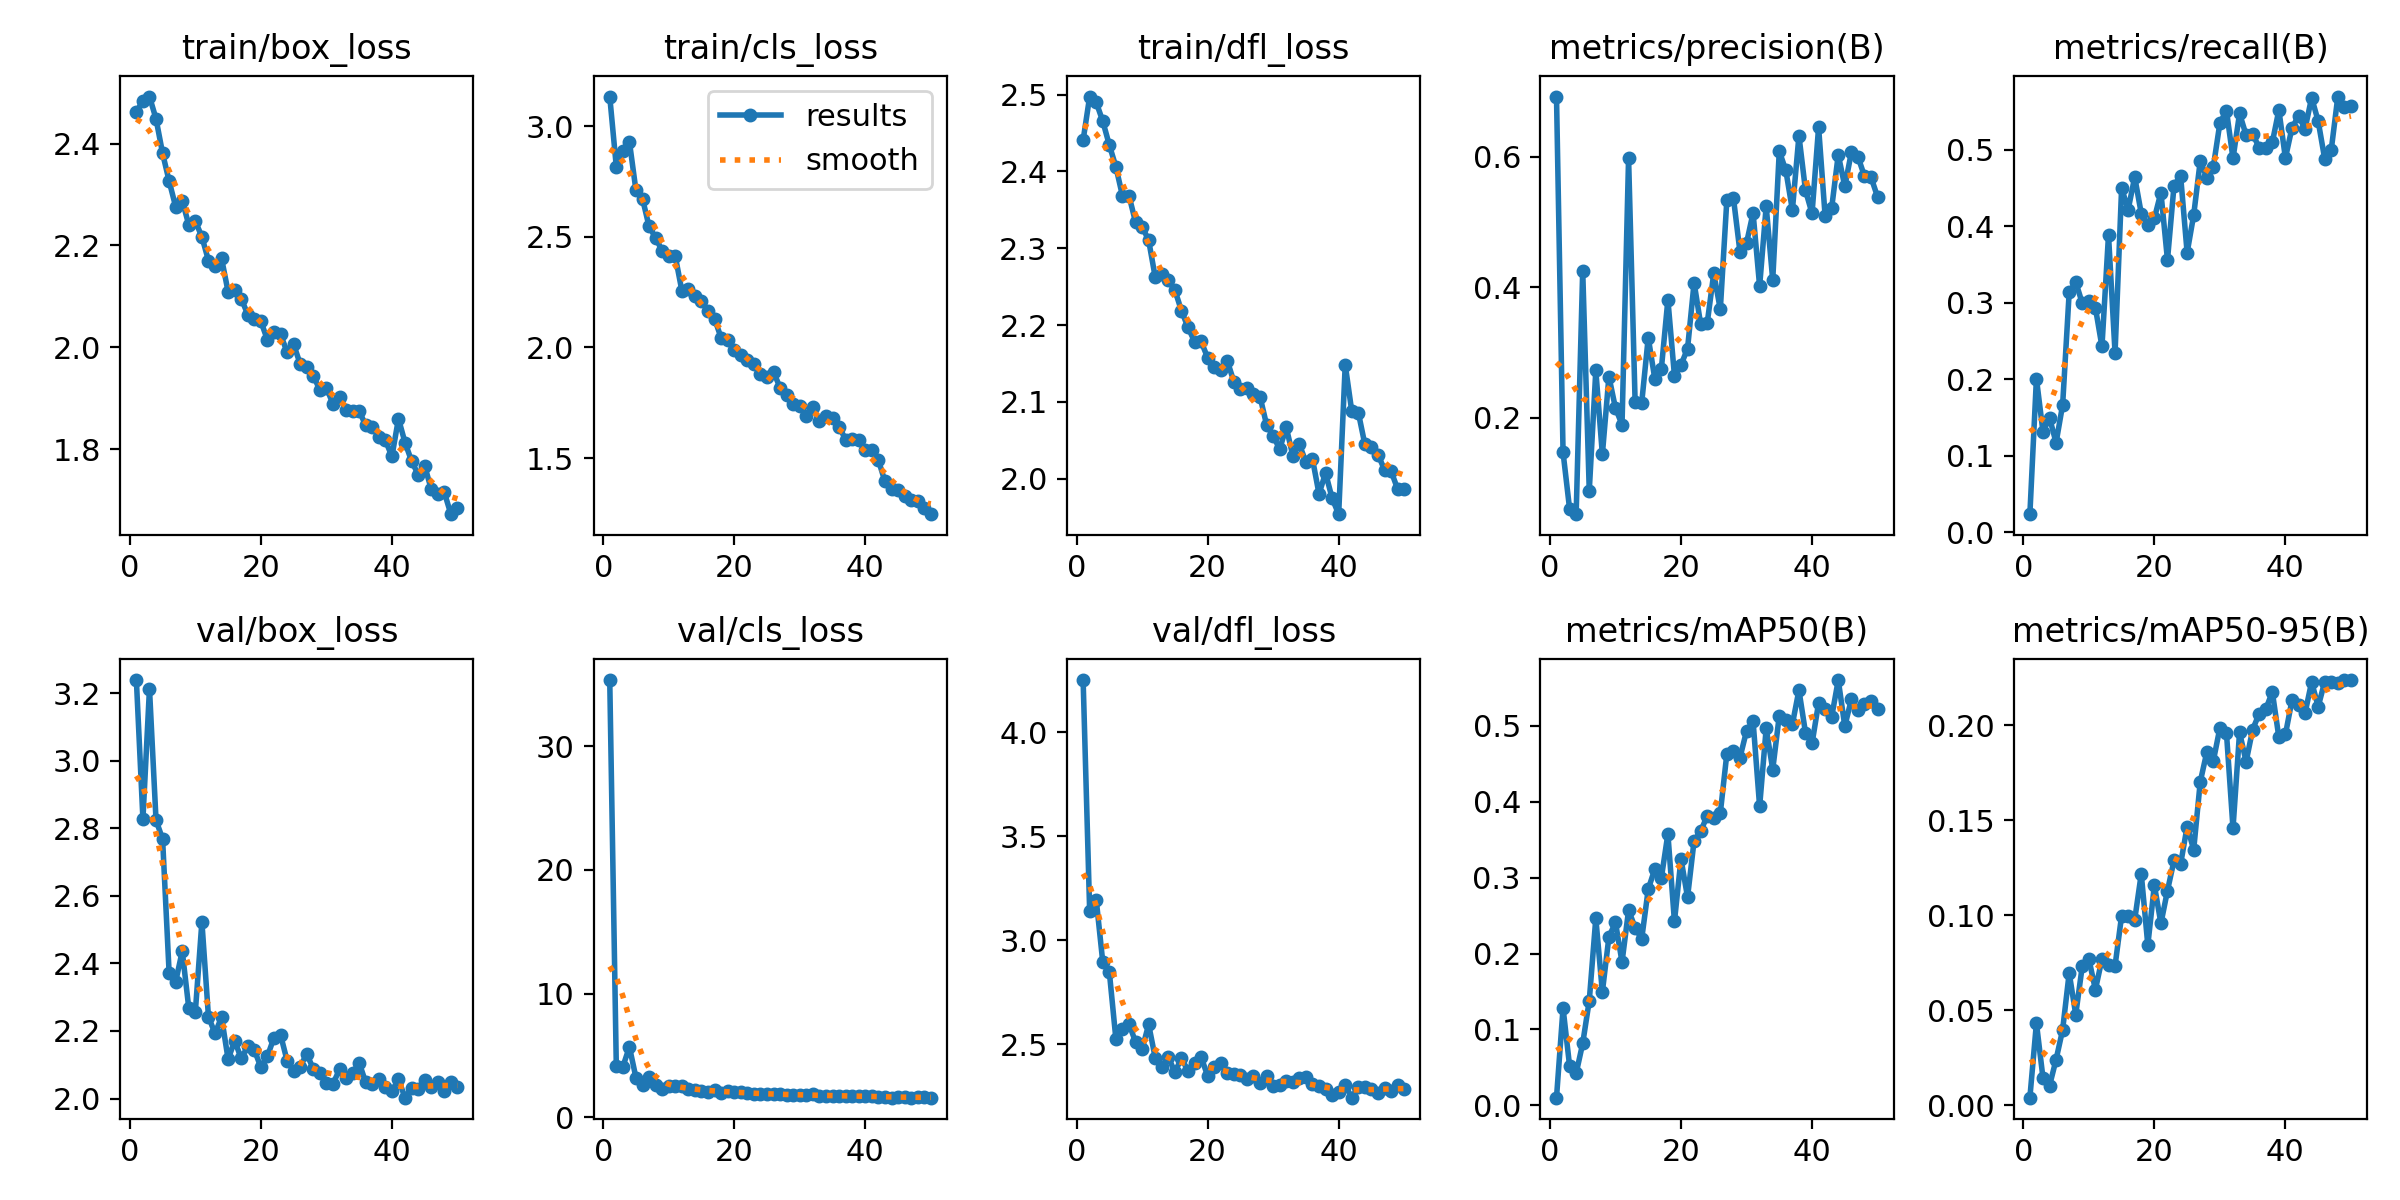

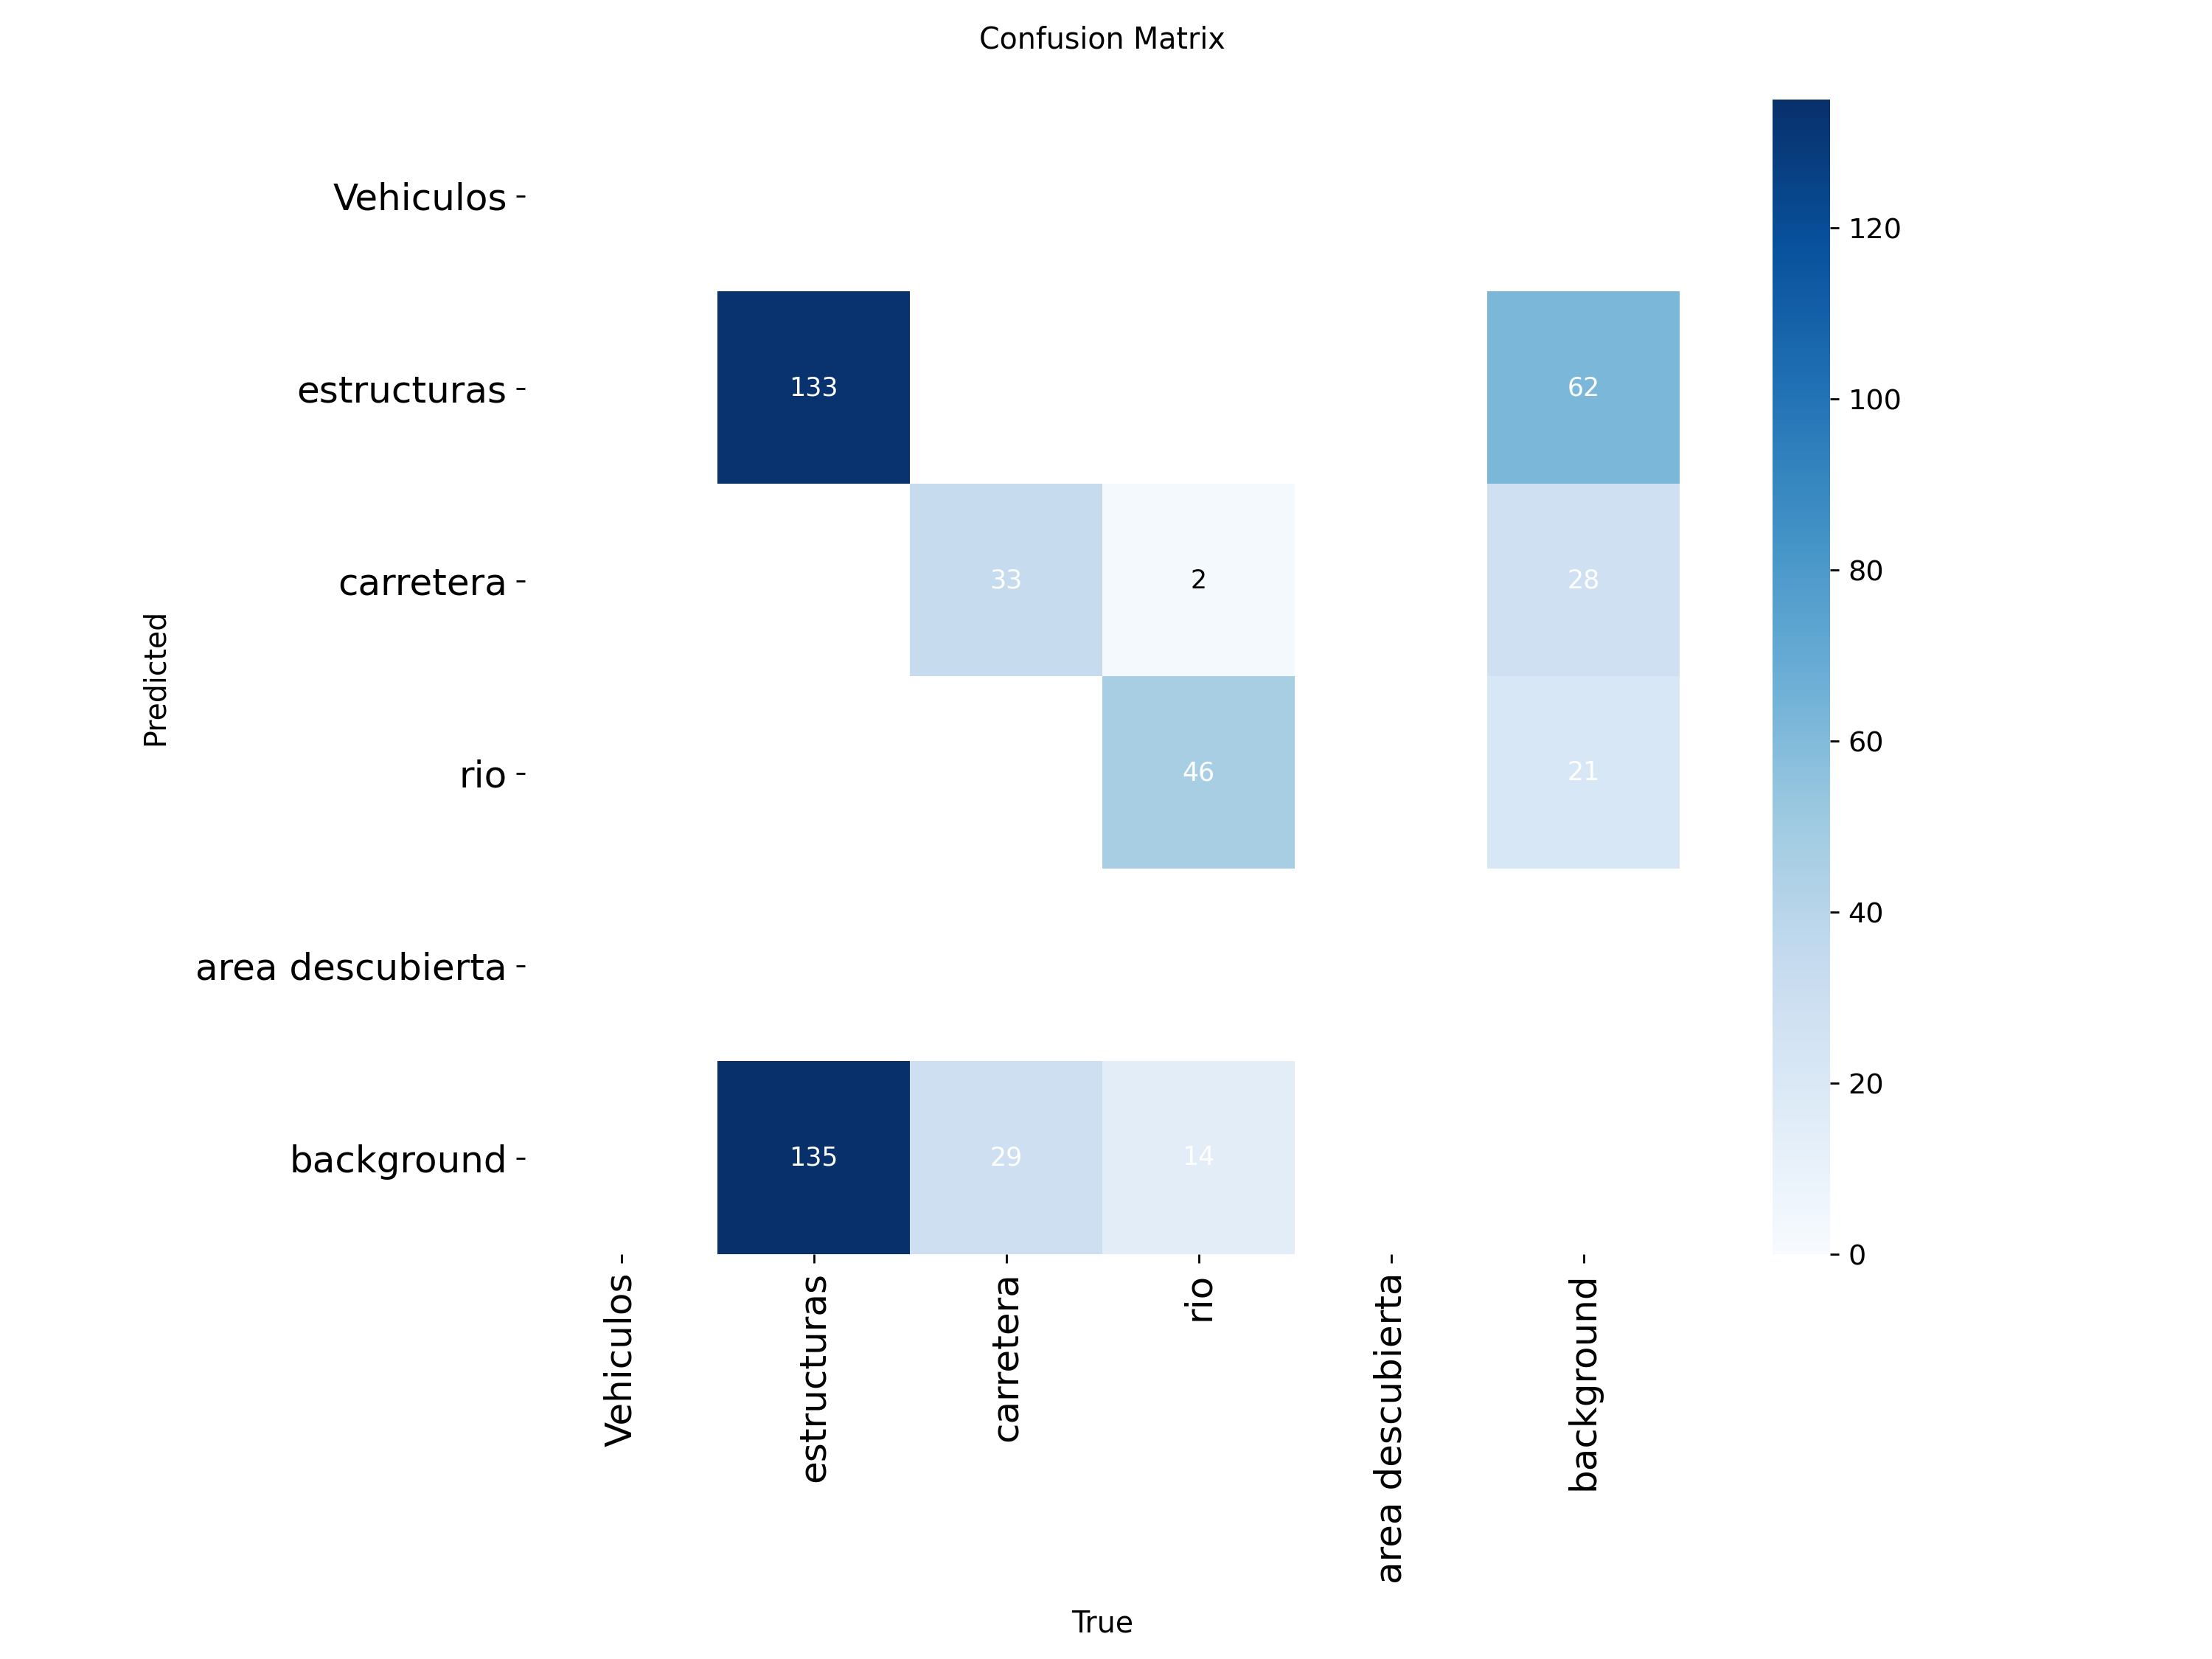

In [24]:
# Mostrar curva de mAP y loss
from PIL import Image as PImage
display(PImage.open('runs/detect/yolo11_finetuned4/results.png'))

# Matriz de confusión
display(PImage.open('runs/detect/yolo11_finetuned4/confusion_matrix.png'))

In [25]:
import shutil
shutil.make_archive('runs_yolo11', 'zip', '/content/runs')

'/content/runs_yolo11.zip'

In [26]:
from google.colab import files
files.download('runs_yolo11.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>